
TUTORIAL COMPLETO DE SEABORN: DE BÁSICO A AVANZADO
=================================================================================

Seaborn es una librería de visualización de datos basada en Matplotlib que 
proporciona una interfaz de alto nivel para crear gráficos estadísticos atractivos.

Fecha: 22-10-2025
=================================================================================

CREAR ENTORNO DESDE TERMINAL (RECOMENDADO)
----------------------------------------------------
Abre tu terminal o Anaconda Prompt y ejecuta:

# 1. Crear entorno con Python 3.12
conda create -n seaborn_env python=3.12 -y

# 2. Activar el entorno
conda activate seaborn_env

# 3. Instalar las librerías necesarias
conda install -c conda-forge seaborn pandas matplotlib numpy jupyter -y

# 4. Verificar instalación
python -c "import seaborn; print(f'Seaborn {seaborn.__version__} instalado')"

# 5. Lanzar Jupyter Notebook desde el entorno
jupyter notebook

# 0. INSTALACIÓN E IMPORTACIÓN

In [1]:
# Para instalar seaborn (ejecutar en terminal):
# pip install seaborn pandas matplotlib numpy

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Verificar versión
print(f"Versión de Seaborn: {sns.__version__}")

# Cargar datasets de ejemplo
tips = sns.load_dataset('tips')
iris = sns.load_dataset('iris')
flights = sns.load_dataset('flights')

print("Datasets cargados:")
print(f"- tips: {tips.shape}")
print(f"- iris: {iris.shape}")
print(f"- flights: {flights.shape}")

Matplotlib is building the font cache; this may take a moment.


Versión de Seaborn: 0.13.2
Datasets cargados:
- tips: (244, 7)
- iris: (150, 5)
- flights: (144, 3)


# 0. MATPLOTLIB.PYPLOT 

In [2]:
print("""
╔══════════════════════════════════════════════════════════════════════════════╗
║                    FUNCIONES DE MATPLOTLIB.PYPLOT                            ║
╚══════════════════════════════════════════════════════════════════════════════╝

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
🎨 plt.figure()
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

DEFINICIÓN:
  Crea una nueva figura (ventana o contenedor) donde se pueden colocar uno o 
  más gráficos. Es el lienzo base para las visualizaciones.

PARA QUÉ SE USA:
  • Crear un nuevo espacio para graficar
  • Controlar el tamaño y resolución de la figura
  • Configurar propiedades globales del gráfico (color de fondo, DPI, etc.)
  • Gestionar múltiples figuras independientes

FUNCIÓN:
  plt.figure(num=None, figsize=None, dpi=None, facecolor=None)

PARÁMETROS PRINCIPALES:
  - num: identificador de la figura (número o string)
  - figsize: tupla (ancho, alto) en pulgadas, ej: (10, 6)
  - dpi: resolución en puntos por pulgada (por defecto 100)
  - facecolor: color de fondo de la figura
  - edgecolor: color del borde de la figura

EJEMPLO:
  fig = plt.figure(figsize=(12, 8), dpi=100)


━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
📊 plt.subplots()
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

DEFINICIÓN:
  Crea una figura y un conjunto de subgráficos (ejes) en una sola llamada.
  Es la forma más común y recomendada de crear múltiples gráficos.

PARA QUÉ SE USA:
  • Crear una cuadrícula de subgráficos de forma rápida
  • Obtener referencias a la figura y los ejes simultáneamente
  • Organizar múltiples visualizaciones en un solo lienzo
  • Facilitar la comparación entre diferentes gráficos

FUNCIÓN:
  fig, ax = plt.subplots(nrows=1, ncols=1, figsize=None, sharex=False, 
                         sharey=False)

PARÁMETROS PRINCIPALES:
  - nrows: número de filas de subgráficos
  - ncols: número de columnas de subgráficos
  - figsize: tupla (ancho, alto) en pulgadas
  - sharex: compartir eje x entre subgráficos (True/False/'all'/'row'/'col')
  - sharey: compartir eje y entre subgráficos (True/False/'all'/'row'/'col')
  - squeeze: si True, elimina dimensiones extra del array de ejes

RETORNA:
  - fig: objeto Figure
  - ax: objeto Axes (único) o array de objetos Axes (múltiples)

EJEMPLOS:
  # Un solo gráfico
  fig, ax = plt.subplots(figsize=(8, 6))
  
  # Cuadrícula 2x2
  fig, axes = plt.subplots(2, 2, figsize=(12, 10))
  
  # Acceder a subgráficos específicos
  axes[0, 0].plot(x, y)  # Primera fila, primera columna
  axes[1, 1].scatter(x, y)  # Segunda fila, segunda columna


━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
📐 plt.tight_layout()
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

DEFINICIÓN:
  Ajusta automáticamente el espaciado entre subgráficos para evitar 
  superposiciones de etiquetas, títulos y ejes.

PARA QUÉ SE USA:
  • Evitar que los títulos y etiquetas se superpongan
  • Optimizar el uso del espacio en la figura
  • Mejorar la legibilidad de gráficos con múltiples subplots
  • Ajustar automáticamente márgenes y padding

FUNCIÓN:
  plt.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)

PARÁMETROS PRINCIPALES:
  - pad: padding entre el borde de la figura y los subplots
  - h_pad: padding vertical entre subplots (height)
  - w_pad: padding horizontal entre subplots (width)
  - rect: rectángulo [left, bottom, right, top] en coordenadas normalizadas

EJEMPLO:
  fig, axes = plt.subplots(2, 2, figsize=(10, 8))
  # ... crear gráficos ...
  plt.tight_layout()  # Ajusta automáticamente el espaciado


━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
👁️ plt.show()
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

DEFINICIÓN:
  Muestra todas las figuras creadas y detiene la ejecución del programa hasta 
  que se cierren las ventanas de las figuras (en scripts). En Jupyter Notebook 
  suele no ser necesario.

PARA QUÉ SE USA:
  • Mostrar los gráficos en pantalla
  • Renderizar las figuras creadas
  • En scripts de Python (.py): OBLIGATORIO para ver los gráficos
  • En Jupyter Notebook: generalmente OPCIONAL (se muestran automáticamente)

FUNCIÓN:
  plt.show(block=True)

PARÁMETROS PRINCIPALES:
  - block: si True, bloquea la ejecución hasta cerrar las ventanas
           si False, continúa la ejecución sin esperar

CUÁNDO USAR plt.show():
  ✓ Scripts de Python (.py): SIEMPRE necesario
  ✓ Programas que no son interactivos: SIEMPRE necesario
  ✗ Jupyter Notebook: generalmente NO necesario
  ✗ IPython con modo interactivo activado: generalmente NO necesario

EJEMPLO:
  # En un script .py
  import matplotlib.pyplot as plt
  
  plt.plot([1, 2, 3], [4, 5, 6])
  plt.title('Mi Gráfico')
  plt.show()  # Necesario en scripts


━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
💡 FLUJO DE TRABAJO TÍPICO
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

# 1. Crear figura y ejes
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

# 2. Crear visualizaciones en cada subgráfico
ax[0, 0].plot(x1, y1)
ax[0, 1].scatter(x2, y2)
ax[1, 0].bar(categories, values)
ax[1, 1].hist(data)

# 3. Añadir títulos y etiquetas
ax[0, 0].set_title('Gráfico de Líneas')
ax[0, 1].set_xlabel('Eje X')

# 4. Ajustar diseño
plt.tight_layout()

# 5. Mostrar (si es necesario)
plt.show()  # Solo en scripts .py


━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
🔄 DIFERENCIAS CLAVE
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

plt.figure() vs plt.subplots():
  • figure(): Solo crea el lienzo, necesitas crear ejes después
  • subplots(): Crea lienzo Y ejes simultáneamente (más conveniente)

plt.tight_layout() vs sin usarlo:
  • Sin tight_layout(): Los elementos pueden sobreponerse
  • Con tight_layout(): Espaciado automático y óptimo

plt.show() en Jupyter vs Scripts:
  • Jupyter: Muestra gráficos automáticamente (opcional)
  • Scripts: Necesario para ver los gráficos (obligatorio)

""")


╔══════════════════════════════════════════════════════════════════════════════╗
║                    FUNCIONES DE MATPLOTLIB.PYPLOT                            ║
╚══════════════════════════════════════════════════════════════════════════════╝

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
🎨 plt.figure()
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

DEFINICIÓN:
  Crea una nueva figura (ventana o contenedor) donde se pueden colocar uno o 
  más gráficos. Es el lienzo base para las visualizaciones.

PARA QUÉ SE USA:
  • Crear un nuevo espacio para graficar
  • Controlar el tamaño y resolución de la figura
  • Configurar propiedades globales del gráfico (color de fondo, DPI, etc.)
  • Gestionar múltiples figuras independientes

FUNCIÓN:
  plt.figure(num=None, figsize=None, dpi=None, facecolor=None)

PARÁMETROS PRINCIPALES:
  - num: identificador de la figura (número o string)
  - figsize: tupla (ancho, alto) en pulgadas, e

# 1. CONFIGURACIÓN INICIAL Y ESTILOS


--- Datasets disponibles en Seaborn ---
['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights']

--- Dataset Tips ---
   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

Dimensiones: (244, 7)

Columnas: ['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size']

--- Estilos disponibles ---
{'axes.facecolor': 'white', 'axes.edgecolor': 'black', 'axes.grid': False, 'axes.axisbelow': 'line', 'axes.labelcolor': 'black', 'figure.facecolor': 'white', 'grid.color': '#b0b0b0', 'grid.linestyle': '-', 'text.color': 'black', 'xtick.color': 'black', 'ytick.color': 'black', 'xtick.direction': 'out', 'ytick.direction': 'out', 'lines.solid_capstyle': <CapStyle

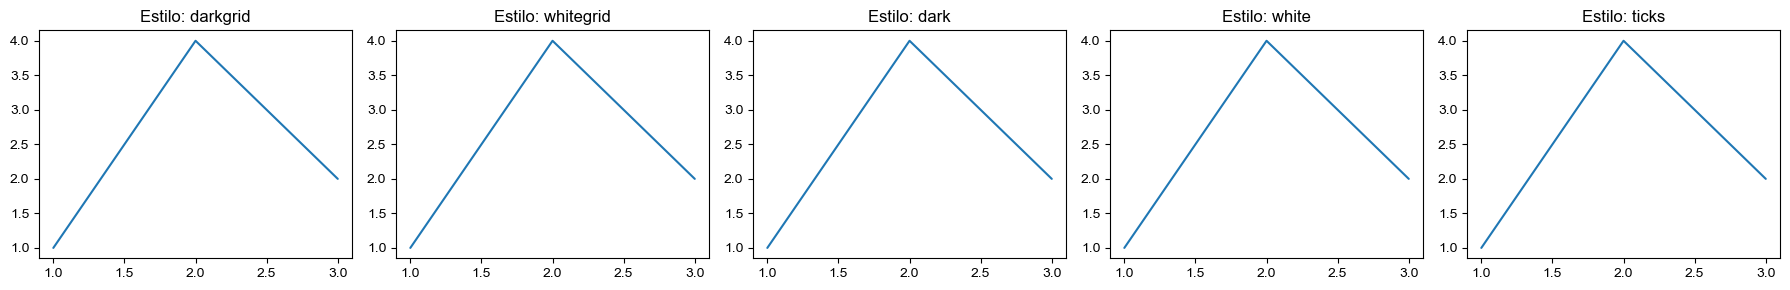


Contextos disponibles: ['paper', 'notebook', 'talk', 'poster']


In [3]:
# Seaborn viene con varios datasets de ejemplo integrados
print("\n--- Datasets disponibles en Seaborn ---")
print(sns.get_dataset_names()[:10])  # Primeros 10

# Cargar dataset de ejemplo: tips (propinas en restaurante)
tips = sns.load_dataset('tips')
print("\n--- Dataset Tips ---")
print(tips.head())
print(f"\nDimensiones: {tips.shape}")
print(f"\nColumnas: {tips.columns.tolist()}")

# ESTILOS DE SEABORN
print("\n--- Estilos disponibles ---")
print(sns.axes_style())

# Probar diferentes estilos
estilos = ['darkgrid', 'whitegrid', 'dark', 'white', 'ticks']

fig, axes = plt.subplots(1, 5, figsize=(18, 3))
for i, estilo in enumerate(estilos):
    sns.set_style(estilo)
    ax = axes[i]
    ax.plot([1, 2, 3], [1, 4, 2])
    ax.set_title(f'Estilo: {estilo}')
plt.tight_layout()
plt.show()

# Establecer estilo predeterminado para el resto del tutorial
sns.set_style('whitegrid')

# CONTEXTOS (tamaños de fuente)
contextos = ['paper', 'notebook', 'talk', 'poster']
print(f"\nContextos disponibles: {contextos}")

# 3. GRÁFICOS DE DISTRIBUCIÓN

## 3.1 HISTOGRAMA

In [4]:
print("""
¿QUÉ ES?
Un histograma divide los datos en intervalos (bins) y cuenta cuántas 
observaciones caen en cada intervalo, mostrándolo como barras.

¿PARA QUÉ SE USA?
- Ver la distribución de una variable numérica
- Identificar la forma de la distribución (normal, asimétrica, bimodal)
- Detectar valores atípicos o rangos sin datos
- Comparar distribuciones entre grupos

FUNCIÓN DE SEABORN:
sns.histplot(data, x, y, hue, bins, kde, stat)

PARÁMETROS PRINCIPALES:
- data: DataFrame con los datos
- x: Variable para el eje x
- bins: Número de intervalos (default: automático)
- kde: True para añadir curva de densidad
- hue: Variable para dividir por categorías
- stat: 'count', 'frequency', 'density', 'probability'
- multiple: 'layer', 'dodge', 'stack', 'fill' (cuando hay hue)

EJEMPLO:
""")


¿QUÉ ES?
Un histograma divide los datos en intervalos (bins) y cuenta cuántas 
observaciones caen en cada intervalo, mostrándolo como barras.

¿PARA QUÉ SE USA?
- Ver la distribución de una variable numérica
- Identificar la forma de la distribución (normal, asimétrica, bimodal)
- Detectar valores atípicos o rangos sin datos
- Comparar distribuciones entre grupos

FUNCIÓN DE SEABORN:
sns.histplot(data, x, y, hue, bins, kde, stat)

PARÁMETROS PRINCIPALES:
- data: DataFrame con los datos
- x: Variable para el eje x
- bins: Número de intervalos (default: automático)
- kde: True para añadir curva de densidad
- hue: Variable para dividir por categorías
- stat: 'count', 'frequency', 'density', 'probability'
- multiple: 'layer', 'dodge', 'stack', 'fill' (cuando hay hue)

EJEMPLO:



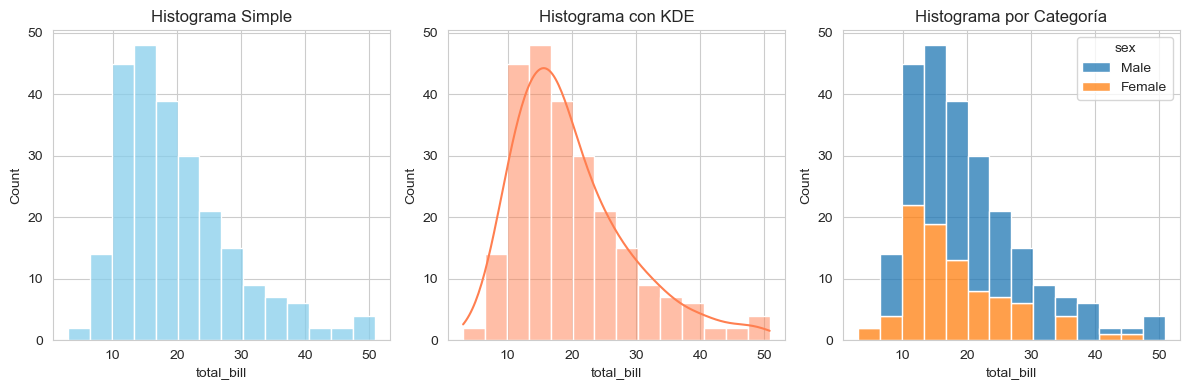

In [5]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.histplot(tips['total_bill'], kde=False, color='skyblue')
plt.title('Histograma Simple')

plt.subplot(1, 3, 2)
sns.histplot(tips['total_bill'], kde=True, color='coral')
plt.title('Histograma con KDE')

plt.subplot(1, 3, 3)
sns.histplot(data=tips, x='total_bill', hue='sex', multiple='stack')
plt.title('Histograma por Categoría')

plt.tight_layout()
plt.show()



## 3.2 KDE PLOT (Kernel Density Estimation)

In [6]:
print("""
¿QUÉ ES?
Un gráfico de estimación de densidad kernel que crea una curva suave 
representando la distribución de probabilidad de los datos.

¿PARA QUÉ SE USA?
- Visualizar distribuciones de forma suave (sin barras discretas)
- Comparar distribuciones entre múltiples grupos
- Ver la densidad bivariada (2D) entre dos variables
- Cuando quieres una representación más "elegante" que un histograma

FUNCIÓN DE SEABORN:
sns.kdeplot(data, x, y, hue, fill, bw_adjust, cut)

PARÁMETROS PRINCIPALES:
- data: DataFrame con los datos
- x, y: Variables (y es opcional, para 2D)
- hue: Variable para múltiples distribuciones
- fill: True para rellenar bajo la curva
- bw_adjust: Ajuste del ancho de banda (suavizado)
- cut: Extensión más allá del rango de datos
- levels: Número de niveles en KDE 2D
- thresh: Umbral para mostrar en KDE 2D

EJEMPLO:
""")


¿QUÉ ES?
Un gráfico de estimación de densidad kernel que crea una curva suave 
representando la distribución de probabilidad de los datos.

¿PARA QUÉ SE USA?
- Visualizar distribuciones de forma suave (sin barras discretas)
- Comparar distribuciones entre múltiples grupos
- Ver la densidad bivariada (2D) entre dos variables
- Cuando quieres una representación más "elegante" que un histograma

FUNCIÓN DE SEABORN:
sns.kdeplot(data, x, y, hue, fill, bw_adjust, cut)

PARÁMETROS PRINCIPALES:
- data: DataFrame con los datos
- x, y: Variables (y es opcional, para 2D)
- hue: Variable para múltiples distribuciones
- fill: True para rellenar bajo la curva
- bw_adjust: Ajuste del ancho de banda (suavizado)
- cut: Extensión más allá del rango de datos
- levels: Número de niveles en KDE 2D
- thresh: Umbral para mostrar en KDE 2D

EJEMPLO:



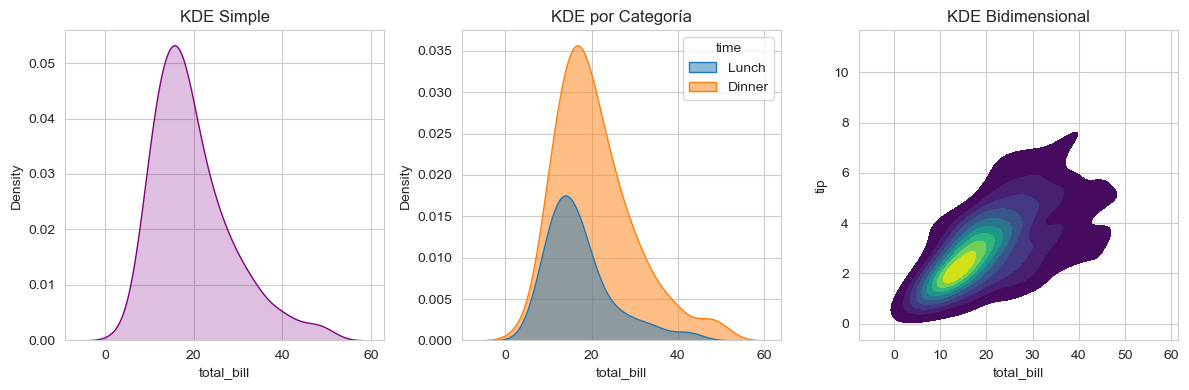

In [7]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
sns.kdeplot(tips['total_bill'], fill=True, color='purple')
plt.title('KDE Simple')

plt.subplot(1, 3, 2)
sns.kdeplot(data=tips, x='total_bill', hue='time', fill=True, alpha=0.5)
plt.title('KDE por Categoría')

plt.subplot(1, 3, 3)
sns.kdeplot(data=tips, x='total_bill', y='tip', fill=True, cmap='viridis')
plt.title('KDE Bidimensional')

plt.tight_layout()
plt.show()


## 3.3 DISTPLOT (combinación)

In [8]:
print("""
¿QUÉ ES?
Distplot era una función que combinaba histograma + KDE + rug plot.
NOTA: Esta función está DEPRECATED desde Seaborn 0.11

¿PARA QUÉ SE USABA?
- Mostrar múltiples visualizaciones de distribución en un solo gráfico
- Análisis completo de una variable en una sola visualización

FUNCIÓN DEPRECATED:
sns.distplot() <- NO USAR

ALTERNATIVA MODERNA:
Usar sns.histplot() con kde=True o combinar múltiples funciones

EJEMPLO CON ALTERNATIVA MODERNA:
""")


¿QUÉ ES?
Distplot era una función que combinaba histograma + KDE + rug plot.
NOTA: Esta función está DEPRECATED desde Seaborn 0.11

¿PARA QUÉ SE USABA?
- Mostrar múltiples visualizaciones de distribución en un solo gráfico
- Análisis completo de una variable en una sola visualización

FUNCIÓN DEPRECATED:
sns.distplot() <- NO USAR

ALTERNATIVA MODERNA:
Usar sns.histplot() con kde=True o combinar múltiples funciones

EJEMPLO CON ALTERNATIVA MODERNA:



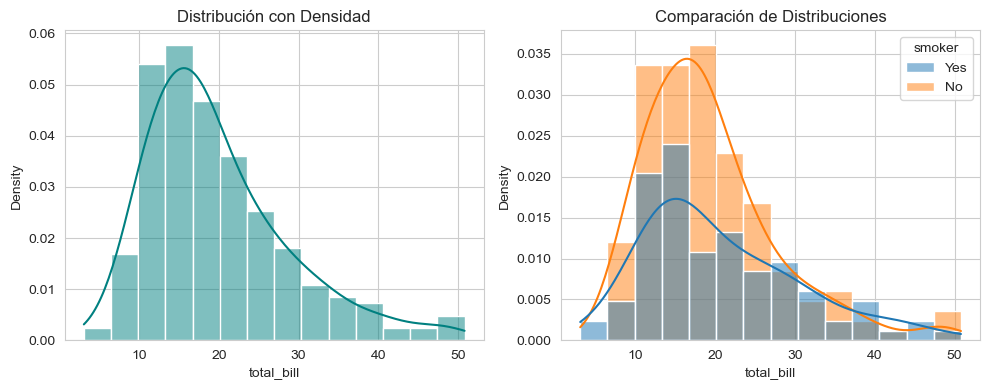

In [9]:

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.histplot(tips['total_bill'], kde=True, stat='density', color='teal')
plt.title('Distribución con Densidad')

plt.subplot(1, 2, 2)
sns.histplot(data=tips, x='total_bill', hue='smoker', kde=True, stat='density')
plt.title('Comparación de Distribuciones')

plt.tight_layout()
plt.show()

# 4. GRÁFICOS CATEGÓRICOS

## 4.1 COUNTPLOT (conteo de categorías)

In [10]:
print("""
¿QUÉ ES?
Un gráfico de barras que muestra la frecuencia (conteo) de observaciones 
en cada categoría.

¿PARA QUÉ SE USA?
- Contar cuántas observaciones hay en cada categoría
- Comparar frecuencias entre categorías
- Visualizar distribuciones de variables categóricas
- Equivalente visual a value_counts() de pandas

FUNCIÓN DE SEABORN:
sns.countplot(data, x, y, hue, order, palette)

PARÁMETROS PRINCIPALES:
- data: DataFrame con los datos
- x o y: Variable categórica (x para vertical, y para horizontal)
- hue: Variable para subdividir categorías
- order: Orden específico de las categorías
- palette: Paleta de colores
- dodge: True/False para separar barras con hue

EJEMPLO:
""")


¿QUÉ ES?
Un gráfico de barras que muestra la frecuencia (conteo) de observaciones 
en cada categoría.

¿PARA QUÉ SE USA?
- Contar cuántas observaciones hay en cada categoría
- Comparar frecuencias entre categorías
- Visualizar distribuciones de variables categóricas
- Equivalente visual a value_counts() de pandas

FUNCIÓN DE SEABORN:
sns.countplot(data, x, y, hue, order, palette)

PARÁMETROS PRINCIPALES:
- data: DataFrame con los datos
- x o y: Variable categórica (x para vertical, y para horizontal)
- hue: Variable para subdividir categorías
- order: Orden específico de las categorías
- palette: Paleta de colores
- dodge: True/False para separar barras con hue

EJEMPLO:



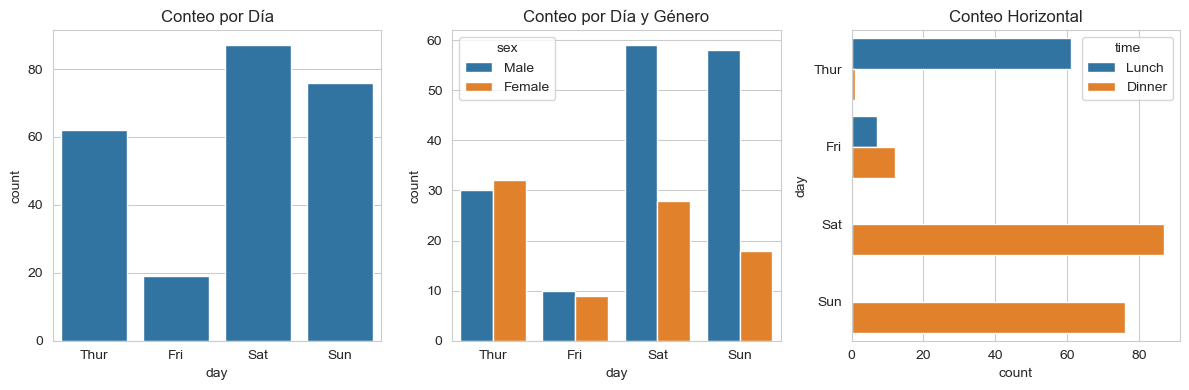

In [11]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
sns.countplot(data=tips, x='day')
plt.title('Conteo por Día')

plt.subplot(1, 3, 2)
sns.countplot(data=tips, x='day', hue='sex')
plt.title('Conteo por Día y Género')

plt.subplot(1, 3, 3)
sns.countplot(data=tips, y='day', hue='time')
plt.title('Conteo Horizontal')

plt.tight_layout()
plt.show()



## 4.2 BARPLOT (con medidas estadísticas)

In [12]:
print("""
¿QUÉ ES?
Un gráfico de barras que muestra una estadística (por defecto, la media) 
de una variable numérica para cada categoría, con barras de error.

¿PARA QUÉ SE USA?
- Comparar promedios entre grupos
- Mostrar cualquier estadística agregada (media, mediana, suma, etc.)
- Visualizar incertidumbre con barras de error
- Comparar métricas entre categorías

FUNCIÓN DE SEABORN:
sns.barplot(data, x, y, hue, estimator, errorbar)

PARÁMETROS PRINCIPALES:
- data: DataFrame con los datos
- x: Variable categórica
- y: Variable numérica
- hue: Variable para subdivisión
- estimator: Función estadística (np.mean, np.median, np.sum, etc.)
- errorbar: Tipo de barra de error ('ci', 'sd', 'se', None)
- ci: Nivel de intervalo de confianza (default: 95)
- palette: Paleta de colores

EJEMPLO:
""")


¿QUÉ ES?
Un gráfico de barras que muestra una estadística (por defecto, la media) 
de una variable numérica para cada categoría, con barras de error.

¿PARA QUÉ SE USA?
- Comparar promedios entre grupos
- Mostrar cualquier estadística agregada (media, mediana, suma, etc.)
- Visualizar incertidumbre con barras de error
- Comparar métricas entre categorías

FUNCIÓN DE SEABORN:
sns.barplot(data, x, y, hue, estimator, errorbar)

PARÁMETROS PRINCIPALES:
- data: DataFrame con los datos
- x: Variable categórica
- y: Variable numérica
- hue: Variable para subdivisión
- estimator: Función estadística (np.mean, np.median, np.sum, etc.)
- errorbar: Tipo de barra de error ('ci', 'sd', 'se', None)
- ci: Nivel de intervalo de confianza (default: 95)
- palette: Paleta de colores

EJEMPLO:



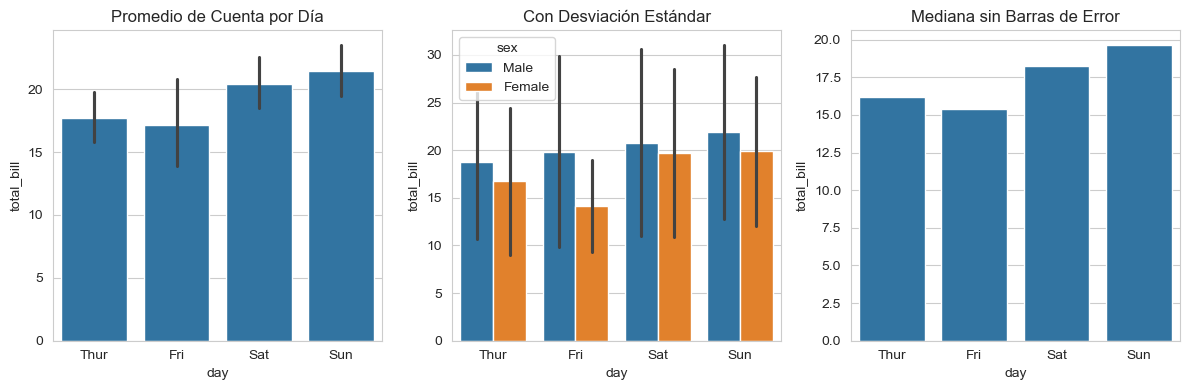

In [13]:

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
sns.barplot(data=tips, x='day', y='total_bill')
plt.title('Promedio de Cuenta por Día')

plt.subplot(1, 3, 2)
sns.barplot(data=tips, x='day', y='total_bill', hue='sex', errorbar='sd')
plt.title('Con Desviación Estándar')

plt.subplot(1, 3, 3)
sns.barplot(data=tips, x='day', y='total_bill', estimator=np.median, errorbar=None)
plt.title('Mediana sin Barras de Error')

plt.tight_layout()
plt.show()



## 4.3 BOXPLOT (diagrama de cajas)

In [14]:
print("""
¿QUÉ ES?
Un diagrama de caja y bigotes que muestra la distribución de datos a través 
de sus cuartiles, mediana y valores atípicos.

¿PARA QUÉ SE USA?
- Visualizar la distribución y dispersión de datos
- Identificar valores atípicos (outliers)
- Comparar distribuciones entre múltiples grupos
- Ver rápidamente mediana, cuartiles y rango

COMPONENTES:
- Línea central: Mediana (Q2, percentil 50)
- Caja: Rango intercuartílico (Q1 a Q3, percentiles 25-75)
- Bigotes: Se extienden hasta 1.5 * IQR desde la caja
- Puntos: Valores atípicos (outliers)

FUNCIÓN DE SEABORN:
sns.boxplot(data, x, y, hue, order, palette, width, whis)

PARÁMETROS PRINCIPALES:
- data: DataFrame con los datos
- x: Variable categórica
- y: Variable numérica
- hue: Variable para subdivisión
- order: Orden de categorías
- palette: Paleta de colores
- width: Ancho de las cajas
- whis: Proporción del IQR para bigotes (default: 1.5)

EJEMPLO:
""")


¿QUÉ ES?
Un diagrama de caja y bigotes que muestra la distribución de datos a través 
de sus cuartiles, mediana y valores atípicos.

¿PARA QUÉ SE USA?
- Visualizar la distribución y dispersión de datos
- Identificar valores atípicos (outliers)
- Comparar distribuciones entre múltiples grupos
- Ver rápidamente mediana, cuartiles y rango

COMPONENTES:
- Línea central: Mediana (Q2, percentil 50)
- Caja: Rango intercuartílico (Q1 a Q3, percentiles 25-75)
- Bigotes: Se extienden hasta 1.5 * IQR desde la caja
- Puntos: Valores atípicos (outliers)

FUNCIÓN DE SEABORN:
sns.boxplot(data, x, y, hue, order, palette, width, whis)

PARÁMETROS PRINCIPALES:
- data: DataFrame con los datos
- x: Variable categórica
- y: Variable numérica
- hue: Variable para subdivisión
- order: Orden de categorías
- palette: Paleta de colores
- width: Ancho de las cajas
- whis: Proporción del IQR para bigotes (default: 1.5)

EJEMPLO:



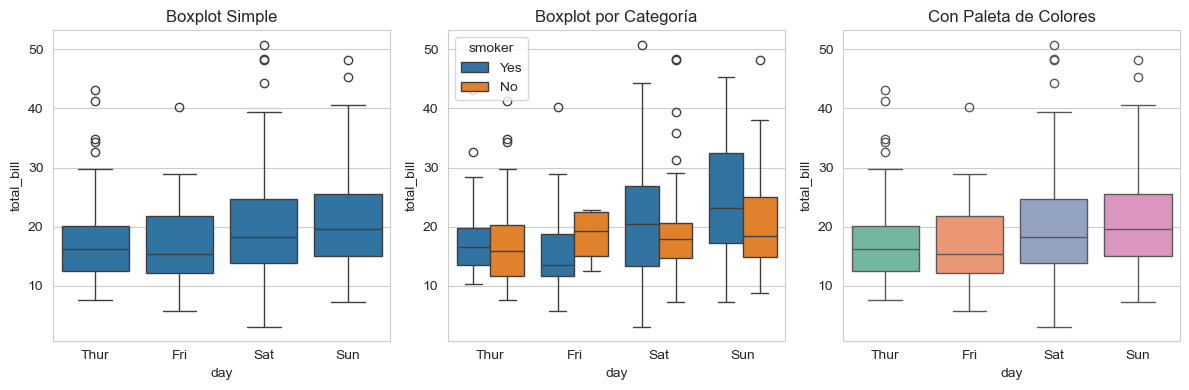

In [15]:

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
sns.boxplot(data=tips, x='day', y='total_bill')
plt.title('Boxplot Simple')

plt.subplot(1, 3, 2)
sns.boxplot(data=tips, x='day', y='total_bill', hue='smoker')
plt.title('Boxplot por Categoría')

plt.subplot(1, 3, 3)
sns.boxplot(data=tips, y='total_bill', x='day', palette='Set2')
plt.title('Con Paleta de Colores')

plt.tight_layout()
plt.show()



## 4.4 VIOLINPLOT (combinación de boxplot y KDE)

In [16]:
print("""
¿QUÉ ES?
Un gráfico que combina un boxplot con un KDE (densidad), mostrando la 
distribución completa de los datos con su forma.

¿PARA QUÉ SE USA?
- Mostrar la distribución completa (no solo cuartiles)
- Ver la densidad de datos en diferentes valores
- Comparar formas de distribución entre grupos
- Detectar distribuciones bimodales o multimodales
- Alternativa más informativa al boxplot

FUNCIÓN DE SEABORN:
sns.violinplot(data, x, y, hue, split, inner, palette)

PARÁMETROS PRINCIPALES:
- data: DataFrame con los datos
- x: Variable categórica
- y: Variable numérica
- hue: Variable para subdivisión
- split: True para dividir el violín (solo con hue)
- inner: 'box', 'quartile', 'point', 'stick', None
- palette: Paleta de colores
- cut: Extensión más allá del rango de datos
- bw: Ancho de banda para el KDE

EJEMPLO:
""")


¿QUÉ ES?
Un gráfico que combina un boxplot con un KDE (densidad), mostrando la 
distribución completa de los datos con su forma.

¿PARA QUÉ SE USA?
- Mostrar la distribución completa (no solo cuartiles)
- Ver la densidad de datos en diferentes valores
- Comparar formas de distribución entre grupos
- Detectar distribuciones bimodales o multimodales
- Alternativa más informativa al boxplot

FUNCIÓN DE SEABORN:
sns.violinplot(data, x, y, hue, split, inner, palette)

PARÁMETROS PRINCIPALES:
- data: DataFrame con los datos
- x: Variable categórica
- y: Variable numérica
- hue: Variable para subdivisión
- split: True para dividir el violín (solo con hue)
- inner: 'box', 'quartile', 'point', 'stick', None
- palette: Paleta de colores
- cut: Extensión más allá del rango de datos
- bw: Ancho de banda para el KDE

EJEMPLO:



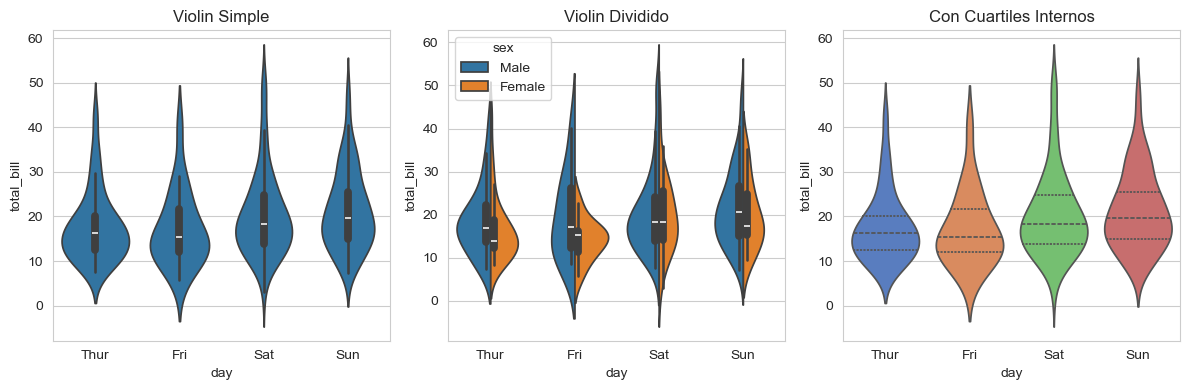

In [17]:

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
sns.violinplot(data=tips, x='day', y='total_bill')
plt.title('Violin Simple')

plt.subplot(1, 3, 2)
sns.violinplot(data=tips, x='day', y='total_bill', hue='sex', split=True)
plt.title('Violin Dividido')

plt.subplot(1, 3, 3)
sns.violinplot(data=tips, x='day', y='total_bill', inner='quartile', palette='muted')
plt.title('Con Cuartiles Internos')

plt.tight_layout()
plt.show()



## 4.5 STRIPPLOT y SWARMPLOT (puntos individuales)

In [18]:
print("""
¿QUÉ SON?
Gráficos que muestran cada observación individual como un punto.
- STRIPPLOT: Puntos con jitter aleatorio (pueden superponerse)
- SWARMPLOT: Puntos ajustados para no superponerse

¿PARA QUÉ SE USAN?
- Mostrar todos los datos individuales
- Ver el tamaño de la muestra
- Complementar boxplot o violinplot
- Identificar patrones en datos pequeños
- Ver distribución de valores exactos

FUNCIONES DE SEABORN:
sns.stripplot(data, x, y, hue, jitter, dodge, alpha)
sns.swarmplot(data, x, y, hue, dodge, size)

PARÁMETROS PRINCIPALES STRIPPLOT:
- jitter: True o valor (0-0.5) para dispersión horizontal
- dodge: True para separar por hue
- alpha: Transparencia (útil con muchos puntos)
- size: Tamaño de los puntos

PARÁMETROS PRINCIPALES SWARMPLOT:
- dodge: True para separar por hue
- size: Tamaño de los puntos
- warn_thresh: Umbral de advertencia para muchos datos

EJEMPLO:
""")


¿QUÉ SON?
Gráficos que muestran cada observación individual como un punto.
- STRIPPLOT: Puntos con jitter aleatorio (pueden superponerse)
- SWARMPLOT: Puntos ajustados para no superponerse

¿PARA QUÉ SE USAN?
- Mostrar todos los datos individuales
- Ver el tamaño de la muestra
- Complementar boxplot o violinplot
- Identificar patrones en datos pequeños
- Ver distribución de valores exactos

FUNCIONES DE SEABORN:
sns.stripplot(data, x, y, hue, jitter, dodge, alpha)
sns.swarmplot(data, x, y, hue, dodge, size)

PARÁMETROS PRINCIPALES STRIPPLOT:
- jitter: True o valor (0-0.5) para dispersión horizontal
- dodge: True para separar por hue
- alpha: Transparencia (útil con muchos puntos)
- size: Tamaño de los puntos

PARÁMETROS PRINCIPALES SWARMPLOT:
- dodge: True para separar por hue
- size: Tamaño de los puntos
- warn_thresh: Umbral de advertencia para muchos datos

EJEMPLO:



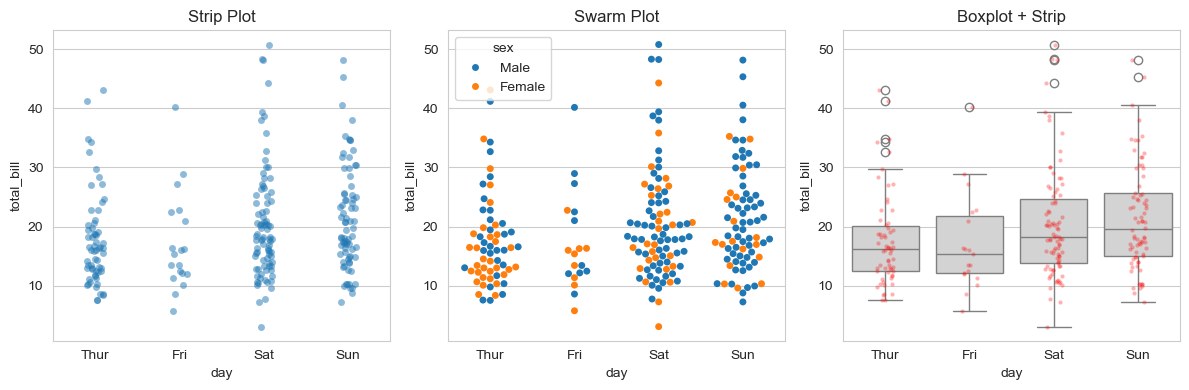

In [19]:

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
sns.stripplot(data=tips, x='day', y='total_bill', alpha=0.5)
plt.title('Strip Plot')

plt.subplot(1, 3, 2)
sns.swarmplot(data=tips, x='day', y='total_bill', hue='sex')
plt.title('Swarm Plot')

plt.subplot(1, 3, 3)
# Combinación: boxplot + stripplot
sns.boxplot(data=tips, x='day', y='total_bill', color='lightgray')
sns.stripplot(data=tips, x='day', y='total_bill', color='red', alpha=0.3, size=3)
plt.title('Boxplot + Strip')

plt.tight_layout()
plt.show()

# 5. GRÁFICOS DE RELACIÓN 

## 5.1 SCATTERPLOT (dispersión)

In [20]:
print("""
¿QUÉ ES?
Un gráfico de dispersión que muestra la relación entre dos variables 
numéricas, con cada observación representada como un punto.

¿PARA QUÉ SE USA?
- Visualizar relaciones entre dos variables numéricas
- Detectar correlaciones (positivas, negativas, o ninguna)
- Identificar patrones, tendencias o agrupaciones
- Detectar outliers multivariados
- Mostrar hasta 4-5 variables (x, y, color, tamaño, forma)

FUNCIÓN DE SEABORN:
sns.scatterplot(data, x, y, hue, size, style, palette, sizes, alpha)

PARÁMETROS PRINCIPALES:
- data: DataFrame con los datos
- x, y: Variables numéricas para ejes
- hue: Variable para color de puntos
- size: Variable para tamaño de puntos
- style: Variable para forma de puntos
- palette: Paleta de colores
- sizes: Tupla (min, max) para tamaños
- alpha: Transparencia
- markers: Diccionario de marcadores por categoría

EJEMPLO:
""")


¿QUÉ ES?
Un gráfico de dispersión que muestra la relación entre dos variables 
numéricas, con cada observación representada como un punto.

¿PARA QUÉ SE USA?
- Visualizar relaciones entre dos variables numéricas
- Detectar correlaciones (positivas, negativas, o ninguna)
- Identificar patrones, tendencias o agrupaciones
- Detectar outliers multivariados
- Mostrar hasta 4-5 variables (x, y, color, tamaño, forma)

FUNCIÓN DE SEABORN:
sns.scatterplot(data, x, y, hue, size, style, palette, sizes, alpha)

PARÁMETROS PRINCIPALES:
- data: DataFrame con los datos
- x, y: Variables numéricas para ejes
- hue: Variable para color de puntos
- size: Variable para tamaño de puntos
- style: Variable para forma de puntos
- palette: Paleta de colores
- sizes: Tupla (min, max) para tamaños
- alpha: Transparencia
- markers: Diccionario de marcadores por categoría

EJEMPLO:



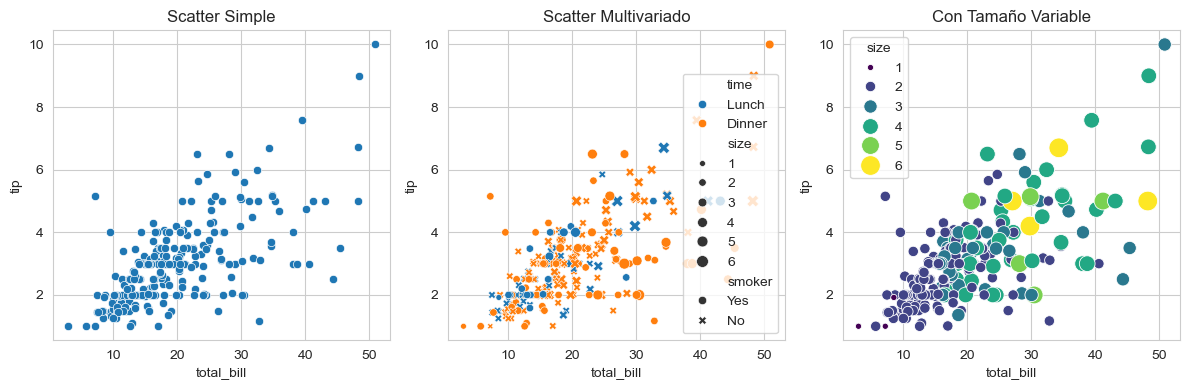

In [21]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
sns.scatterplot(data=tips, x='total_bill', y='tip')
plt.title('Scatter Simple')

plt.subplot(1, 3, 2)
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='time', style='smoker', size='size')
plt.title('Scatter Multivariado')

plt.subplot(1, 3, 3)
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='size', size='size', 
                palette='viridis', sizes=(20, 200))
plt.title('Con Tamaño Variable')

plt.tight_layout()
plt.show()

## 5.2 LINEPLOT (líneas)

In [22]:
print("""
¿QUÉ ES?
Un gráfico de líneas que conecta puntos de datos, ideal para mostrar 
tendencias a lo largo del tiempo o secuencias ordenadas.

¿PARA QUÉ SE USA?
- Visualizar series temporales
- Mostrar tendencias y evolución
- Comparar múltiples series
- Mostrar relaciones continuas
- Visualizar datos con orden natural

FUNCIÓN DE SEABORN:
sns.lineplot(data, x, y, hue, size, style, markers, dashes, errorbar)

PARÁMETROS PRINCIPALES:
- data: DataFrame con los datos
- x, y: Variables para ejes
- hue: Variable para múltiples líneas
- size: Variable para grosor de líneas
- style: Variable para estilo de línea
- markers: True o lista de marcadores
- dashes: True o lista de estilos de línea
- errorbar: Tipo de banda de error ('ci', 'sd', 'se', None)
- ci: Nivel de intervalo de confianza
- estimator: Función agregación (default: mean)

EJEMPLO:
""")


¿QUÉ ES?
Un gráfico de líneas que conecta puntos de datos, ideal para mostrar 
tendencias a lo largo del tiempo o secuencias ordenadas.

¿PARA QUÉ SE USA?
- Visualizar series temporales
- Mostrar tendencias y evolución
- Comparar múltiples series
- Mostrar relaciones continuas
- Visualizar datos con orden natural

FUNCIÓN DE SEABORN:
sns.lineplot(data, x, y, hue, size, style, markers, dashes, errorbar)

PARÁMETROS PRINCIPALES:
- data: DataFrame con los datos
- x, y: Variables para ejes
- hue: Variable para múltiples líneas
- size: Variable para grosor de líneas
- style: Variable para estilo de línea
- markers: True o lista de marcadores
- dashes: True o lista de estilos de línea
- errorbar: Tipo de banda de error ('ci', 'sd', 'se', None)
- ci: Nivel de intervalo de confianza
- estimator: Función agregación (default: mean)

EJEMPLO:




--- Dataset Flights ---
   year month  passengers
0  1949   Jan         112
1  1949   Feb         118
2  1949   Mar         132
3  1949   Apr         129
4  1949   May         121


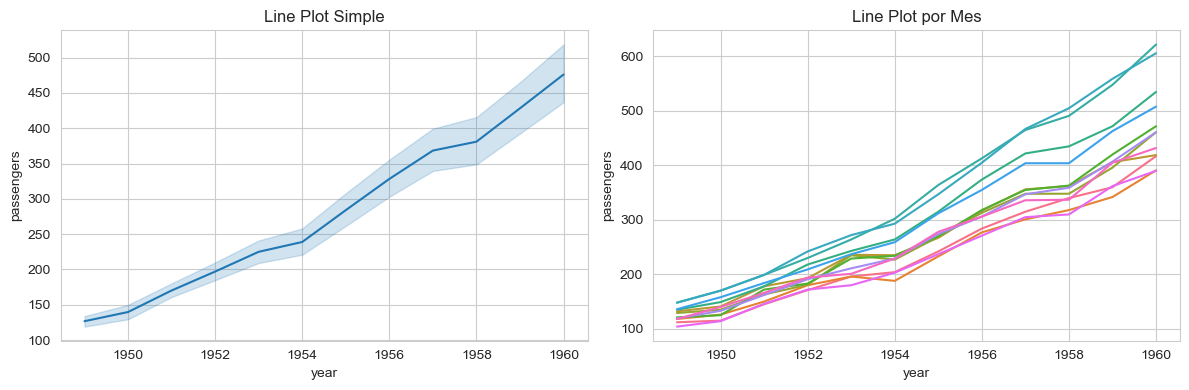

In [23]:

# Cargar dataset de ejemplo con series temporales
flights = sns.load_dataset('flights')
print("\n--- Dataset Flights ---")
print(flights.head())

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.lineplot(data=flights, x='year', y='passengers')
plt.title('Line Plot Simple')

plt.subplot(1, 2, 2)
sns.lineplot(data=flights, x='year', y='passengers', hue='month', legend=False)
plt.title('Line Plot por Mes')

plt.tight_layout()
plt.show()


## 5.3 REGPLOT (regresión)

In [24]:
print("""
¿QUÉ ES?
Un gráfico de dispersión con una línea de regresión ajustada y su 
intervalo de confianza.

¿PARA QUÉ SE USA?
- Visualizar relaciones lineales entre variables
- Mostrar la tendencia general de los datos
- Evaluar la fuerza de la correlación
- Ajustar modelos polinomiales o LOWESS
- Mostrar incertidumbre de la predicción

FUNCIÓN DE SEABORN:
sns.regplot(data, x, y, order, logistic, lowess, scatter_kws, line_kws)

PARÁMETROS PRINCIPALES:
- data: DataFrame con los datos
- x, y: Variables numéricas
- order: Orden del polinomio (1=lineal, 2=cuadrático, etc.)
- logistic: True para regresión logística
- lowess: True para regresión local no paramétrica
- robust: True para regresión robusta (resistente a outliers)
- ci: Nivel de intervalo de confianza (default: 95)
- scatter_kws: Dict con parámetros para puntos
- line_kws: Dict con parámetros para línea

EJEMPLO:
""")


¿QUÉ ES?
Un gráfico de dispersión con una línea de regresión ajustada y su 
intervalo de confianza.

¿PARA QUÉ SE USA?
- Visualizar relaciones lineales entre variables
- Mostrar la tendencia general de los datos
- Evaluar la fuerza de la correlación
- Ajustar modelos polinomiales o LOWESS
- Mostrar incertidumbre de la predicción

FUNCIÓN DE SEABORN:
sns.regplot(data, x, y, order, logistic, lowess, scatter_kws, line_kws)

PARÁMETROS PRINCIPALES:
- data: DataFrame con los datos
- x, y: Variables numéricas
- order: Orden del polinomio (1=lineal, 2=cuadrático, etc.)
- logistic: True para regresión logística
- lowess: True para regresión local no paramétrica
- robust: True para regresión robusta (resistente a outliers)
- ci: Nivel de intervalo de confianza (default: 95)
- scatter_kws: Dict con parámetros para puntos
- line_kws: Dict con parámetros para línea

EJEMPLO:



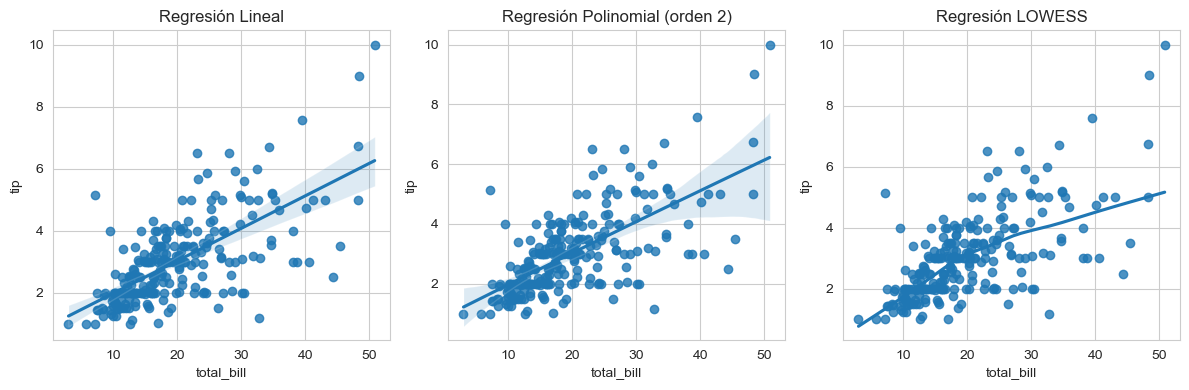

In [25]:

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
sns.regplot(data=tips, x='total_bill', y='tip')
plt.title('Regresión Lineal')

plt.subplot(1, 3, 2)
sns.regplot(data=tips, x='total_bill', y='tip', order=2)
plt.title('Regresión Polinomial (orden 2)')

plt.subplot(1, 3, 3)
sns.regplot(data=tips, x='total_bill', y='tip', lowess=True)
plt.title('Regresión LOWESS')

plt.tight_layout()
plt.show()



## 5.4 RESIDPLOT (residuos)

In [26]:
print("""
¿QUÉ ES?
Un gráfico que muestra los residuos (diferencias entre valores observados 
y predichos) de un modelo de regresión.

¿PARA QUÉ SE USA?
- Evaluar la calidad del ajuste de regresión
- Verificar supuestos de regresión lineal
- Detectar patrones no lineales
- Identificar heterocedasticidad (varianza no constante)
- Encontrar outliers influyentes

FUNCIÓN DE SEABORN:
sns.residplot(data, x, y, order, lowess, scatter_kws, line_kws)

PARÁMETROS PRINCIPALES:
- data: DataFrame con los datos
- x, y: Variables del modelo
- order: Orden del polinomio para ajuste
- lowess: True para línea LOWESS en residuos
- robust: True para regresión robusta
- scatter_kws: Dict con parámetros para puntos
- line_kws: Dict con parámetros para línea en y=0

INTERPRETACIÓN:
- Residuos alrededor de 0 sin patrón: buen ajuste
- Patrón curvo: relación no lineal no capturada
- Forma de embudo: varianza no constante
- Puntos muy alejados: outliers potenciales

EJEMPLO:
""")


¿QUÉ ES?
Un gráfico que muestra los residuos (diferencias entre valores observados 
y predichos) de un modelo de regresión.

¿PARA QUÉ SE USA?
- Evaluar la calidad del ajuste de regresión
- Verificar supuestos de regresión lineal
- Detectar patrones no lineales
- Identificar heterocedasticidad (varianza no constante)
- Encontrar outliers influyentes

FUNCIÓN DE SEABORN:
sns.residplot(data, x, y, order, lowess, scatter_kws, line_kws)

PARÁMETROS PRINCIPALES:
- data: DataFrame con los datos
- x, y: Variables del modelo
- order: Orden del polinomio para ajuste
- lowess: True para línea LOWESS en residuos
- robust: True para regresión robusta
- scatter_kws: Dict con parámetros para puntos
- line_kws: Dict con parámetros para línea en y=0

INTERPRETACIÓN:
- Residuos alrededor de 0 sin patrón: buen ajuste
- Patrón curvo: relación no lineal no capturada
- Forma de embudo: varianza no constante
- Puntos muy alejados: outliers potenciales

EJEMPLO:



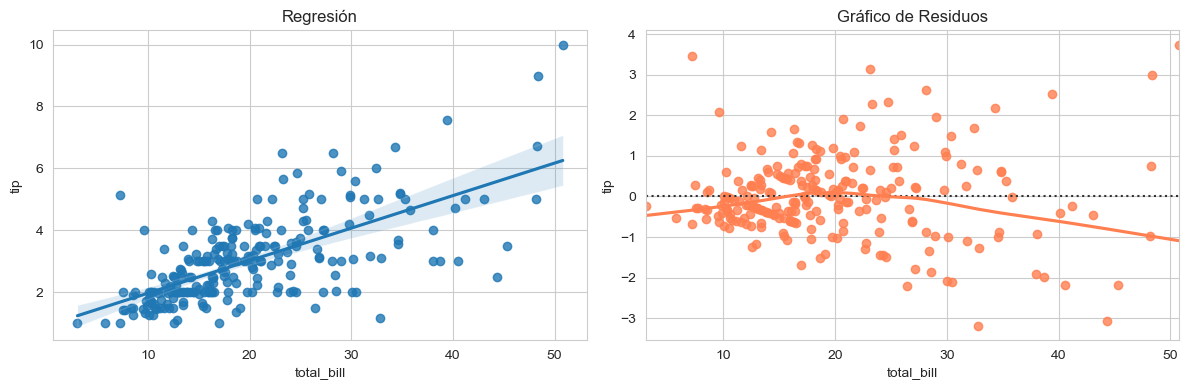

In [27]:

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.regplot(data=tips, x='total_bill', y='tip')
plt.title('Regresión')

plt.subplot(1, 2, 2)
sns.residplot(data=tips, x='total_bill', y='tip', lowess=True, color='coral')
plt.title('Gráfico de Residuos')

plt.tight_layout()
plt.show()

# 6. MATRICES Y MAPAS DE CALOR

## 6.1 HEATMAP (mapa de calor)

In [28]:
print("""
¿QUÉ ES?
Un mapa de calor es una representación gráfica de datos en forma de matriz,
donde los valores se representan mediante colores. Cada celda tiene un color
que corresponde a su valor numérico.

¿PARA QUÉ SE USA?
- Visualizar matrices de correlación entre variables
- Mostrar matrices de confusión en clasificación
- Representar datos tabulares con valores numéricos
- Identificar patrones en datos bidimensionales
- Comparar valores entre categorías (tablas pivote)
- Detectar clusters o agrupaciones visuales

CASOS DE USO COMUNES:
1. Análisis de correlación entre variables
2. Matrices de confusión en ML
3. Datos de series temporales (año x mes)
4. Análisis de sentimientos o encuestas
5. Mapas de calor de actividad (hora x día)

FUNCIÓN DE SEABORN:
sns.heatmap(data, vmin, vmax, cmap, center, annot, fmt, linewidths, 
            square, cbar_kws, xticklabels, yticklabels, mask)

PARÁMETROS PRINCIPALES:
- data: Matriz 2D (DataFrame, array numpy)
- vmin, vmax: Valores mínimo y máximo para el mapa de color
- cmap: Mapa de colores ('viridis', 'coolwarm', 'RdYlGn', etc.)
- center: Valor para centrar el mapa de colores (útil para correlaciones)
- annot: True para mostrar valores en las celdas
- fmt: Formato de los valores anotados ('.2f', 'd', etc.)
- linewidths: Grosor de líneas entre celdas
- linecolor: Color de las líneas
- square: True para celdas cuadradas
- cbar: True/False para mostrar barra de color
- cbar_kws: Dict con parámetros para la barra de color
- xticklabels, yticklabels: Etiquetas para ejes
- mask: Matriz booleana para ocultar celdas

PALETAS COMUNES:
- Secuenciales: 'viridis', 'plasma', 'Blues', 'Greens', 'YlOrRd'
- Divergentes: 'coolwarm', 'RdBu', 'RdYlGn', 'PiYG'
- Perceptuales: 'rocket', 'mako', 'flare'

EJEMPLOS:
""")


¿QUÉ ES?
Un mapa de calor es una representación gráfica de datos en forma de matriz,
donde los valores se representan mediante colores. Cada celda tiene un color
que corresponde a su valor numérico.

¿PARA QUÉ SE USA?
- Visualizar matrices de correlación entre variables
- Mostrar matrices de confusión en clasificación
- Representar datos tabulares con valores numéricos
- Identificar patrones en datos bidimensionales
- Comparar valores entre categorías (tablas pivote)
- Detectar clusters o agrupaciones visuales

CASOS DE USO COMUNES:
1. Análisis de correlación entre variables
2. Matrices de confusión en ML
3. Datos de series temporales (año x mes)
4. Análisis de sentimientos o encuestas
5. Mapas de calor de actividad (hora x día)

FUNCIÓN DE SEABORN:
sns.heatmap(data, vmin, vmax, cmap, center, annot, fmt, linewidths, 
            square, cbar_kws, xticklabels, yticklabels, mask)

PARÁMETROS PRINCIPALES:
- data: Matriz 2D (DataFrame, array numpy)
- vmin, vmax: Valores mínimo y máximo pa

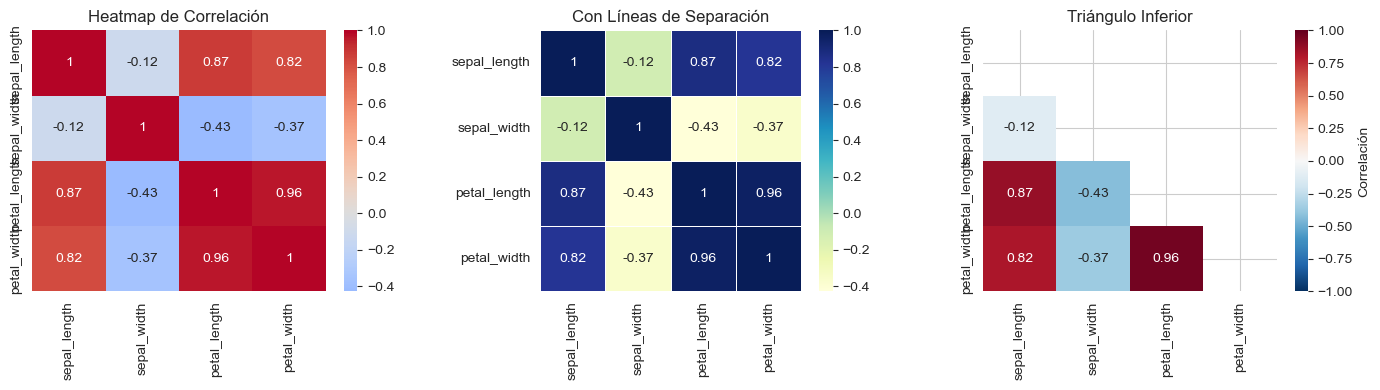

In [29]:
# Crear matriz de correlación
iris = sns.load_dataset('iris')
corr_matrix = iris.corr(numeric_only=True)

plt.figure(figsize=(14, 4))

plt.subplot(1, 3, 1)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap de Correlación')

plt.subplot(1, 3, 2)
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', linewidths=0.5, square=True)
plt.title('Con Líneas de Separación')

plt.subplot(1, 3, 3)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='RdBu_r', center=0, 
            vmin=-1, vmax=1, cbar_kws={'label': 'Correlación'})
plt.title('Triángulo Inferior')

plt.tight_layout()
plt.show()



## 6.2 CLUSTERMAP (heatmap con dendrogramas)

In [30]:
print("""
¿QUÉ ES?
Un clustermap es un heatmap combinado con dendrogramas de clustering 
jerárquico. Reorganiza automáticamente filas y columnas para agrupar
elementos similares juntos.

¿PARA QUÉ SE USA?
- Encontrar patrones ocultos en los datos
- Agrupar variables o muestras similares
- Análisis de expresión génica (bioinformática)
- Segmentación de clientes o productos
- Identificar grupos naturales en datos multivariados
- Visualizar taxonomías o jerarquías

COMPONENTES:
- Heatmap central: Mapa de calor con datos
- Dendrogramas laterales: Árbol de clustering jerárquico
  * Superior: Clustering de columnas
  * Lateral: Clustering de filas
- La altura del dendrograma indica la distancia entre clusters

FUNCIÓN DE SEABORN:
sns.clustermap(data, method, metric, standard_scale, z_score, cmap,
               center, row_cluster, col_cluster, figsize, cbar_kws,
               dendrogram_ratio, colors_ratio)

PARÁMETROS PRINCIPALES:
- data: DataFrame o matriz
- method: Método de linkage ('average', 'single', 'complete', 'ward')
- metric: Métrica de distancia ('euclidean', 'correlation', 'cosine')
- standard_scale: 0 (filas) o 1 (columnas) para estandarizar
- z_score: 0 (filas) o 1 (columnas) para z-score
- cmap: Mapa de colores
- center: Valor para centrar colores
- row_cluster: True/False para clustering de filas
- col_cluster: True/False para clustering de columnas
- figsize: Tamaño de la figura (ancho, alto)
- dendrogram_ratio: Proporción del dendrograma
- colors_ratio: Proporción de la barra de colores
- row_colors, col_colors: Colores para categorías

MÉTODOS DE LINKAGE:
- 'ward': Minimiza varianza (más usado)
- 'average': Promedio de distancias
- 'complete': Máxima distancia
- 'single': Mínima distancia

EJEMPLOS:
""")


¿QUÉ ES?
Un clustermap es un heatmap combinado con dendrogramas de clustering 
jerárquico. Reorganiza automáticamente filas y columnas para agrupar
elementos similares juntos.

¿PARA QUÉ SE USA?
- Encontrar patrones ocultos en los datos
- Agrupar variables o muestras similares
- Análisis de expresión génica (bioinformática)
- Segmentación de clientes o productos
- Identificar grupos naturales en datos multivariados
- Visualizar taxonomías o jerarquías

COMPONENTES:
- Heatmap central: Mapa de calor con datos
- Dendrogramas laterales: Árbol de clustering jerárquico
  * Superior: Clustering de columnas
  * Lateral: Clustering de filas
- La altura del dendrograma indica la distancia entre clusters

FUNCIÓN DE SEABORN:
sns.clustermap(data, method, metric, standard_scale, z_score, cmap,
               center, row_cluster, col_cluster, figsize, cbar_kws,
               dendrogram_ratio, colors_ratio)

PARÁMETROS PRINCIPALES:
- data: DataFrame o matriz
- method: Método de linkage ('average', 

<Figure size 1000x800 with 0 Axes>

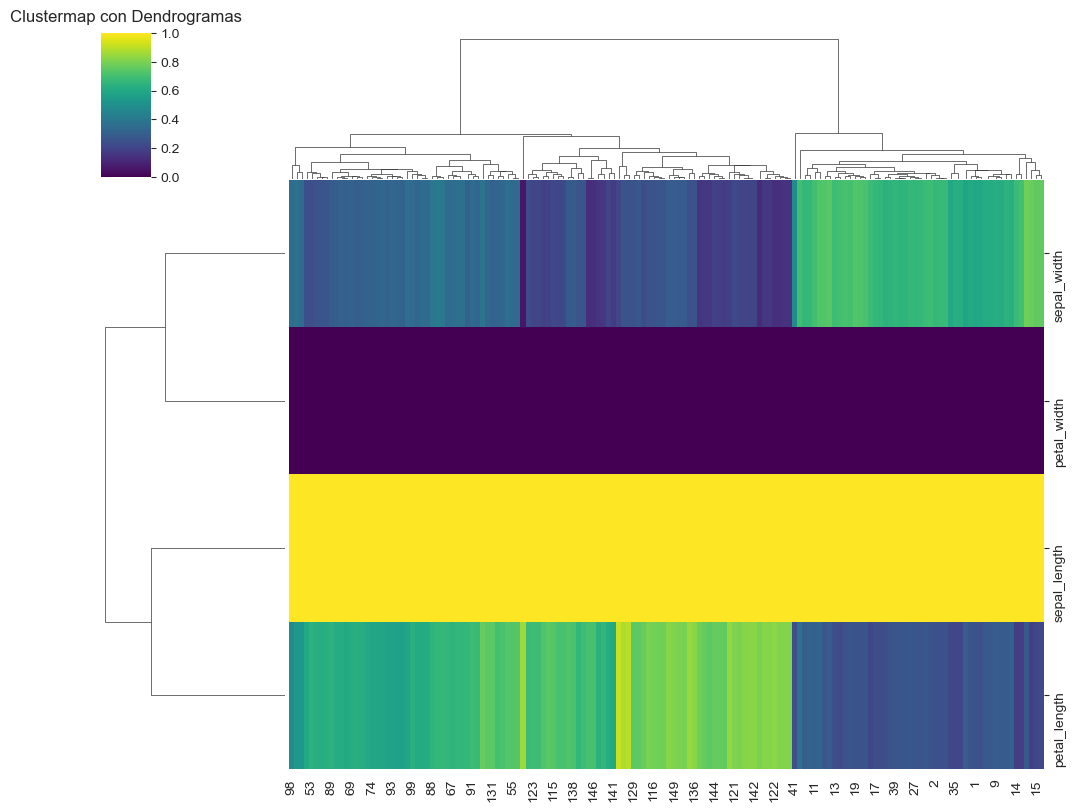

In [31]:
# Crear datos de ejemplo
data = iris.select_dtypes(include=[np.number]).T

plt.figure(figsize=(10, 8))
sns.clustermap(data, cmap='viridis', standard_scale=1, figsize=(10, 8))
plt.title('Clustermap con Dendrogramas', y=1.02)
plt.show()

# 7. GRÁFICOS MULTIVARIADOS

## 7.1 PAIRPLOT (matriz de dispersión)

In [32]:
print("""
¿QUÉ ES?
Un pairplot crea una matriz de gráficos que muestra las relaciones entre
todas las variables numéricas del dataset. En la diagonal muestra la 
distribución de cada variable, y fuera de la diagonal muestra scatterplots
entre pares de variables.

¿PARA QUÉ SE USA?
- Análisis exploratorio de datos (EDA) inicial
- Identificar correlaciones entre múltiples variables
- Detectar relaciones no lineales
- Comparar distribuciones entre grupos
- Identificar outliers multivariados
- Visualizar separabilidad de clases (clasificación)

ESTRUCTURA:
- Diagonal: Distribución de cada variable (hist o kde)
- Off-diagonal: Scatterplots entre pares de variables
- Cada fila/columna representa una variable

FUNCIÓN DE SEABORN:
sns.pairplot(data, hue, vars, x_vars, y_vars, kind, diag_kind, 
             markers, palette, plot_kws, diag_kws, corner)

PARÁMETROS PRINCIPALES:
- data: DataFrame
- hue: Variable categórica para colorear puntos
- vars: Lista de variables a incluir (None = todas las numéricas)
- x_vars, y_vars: Subconjuntos específicos de variables
- kind: Tipo de gráfico off-diagonal ('scatter', 'kde', 'hist', 'reg')
- diag_kind: Tipo de gráfico diagonal ('auto', 'hist', 'kde', None)
- markers: Estilos de marcadores por categoría
- palette: Paleta de colores
- hue_order: Orden de categorías para hue
- corner: True para mostrar solo triángulo inferior
- plot_kws: Dict con parámetros para gráficos off-diagonal
- diag_kws: Dict con parámetros para diagonal
- height: Altura de cada subplot
- aspect: Ratio ancho/alto de cada subplot

EJEMPLOS:
""")


¿QUÉ ES?
Un pairplot crea una matriz de gráficos que muestra las relaciones entre
todas las variables numéricas del dataset. En la diagonal muestra la 
distribución de cada variable, y fuera de la diagonal muestra scatterplots
entre pares de variables.

¿PARA QUÉ SE USA?
- Análisis exploratorio de datos (EDA) inicial
- Identificar correlaciones entre múltiples variables
- Detectar relaciones no lineales
- Comparar distribuciones entre grupos
- Identificar outliers multivariados
- Visualizar separabilidad de clases (clasificación)

ESTRUCTURA:
- Diagonal: Distribución de cada variable (hist o kde)
- Off-diagonal: Scatterplots entre pares de variables
- Cada fila/columna representa una variable

FUNCIÓN DE SEABORN:
sns.pairplot(data, hue, vars, x_vars, y_vars, kind, diag_kind, 
             markers, palette, plot_kws, diag_kws, corner)

PARÁMETROS PRINCIPALES:
- data: DataFrame
- hue: Variable categórica para colorear puntos
- vars: Lista de variables a incluir (None = todas las numéric


Generando Pairplot (puede tardar unos segundos)...


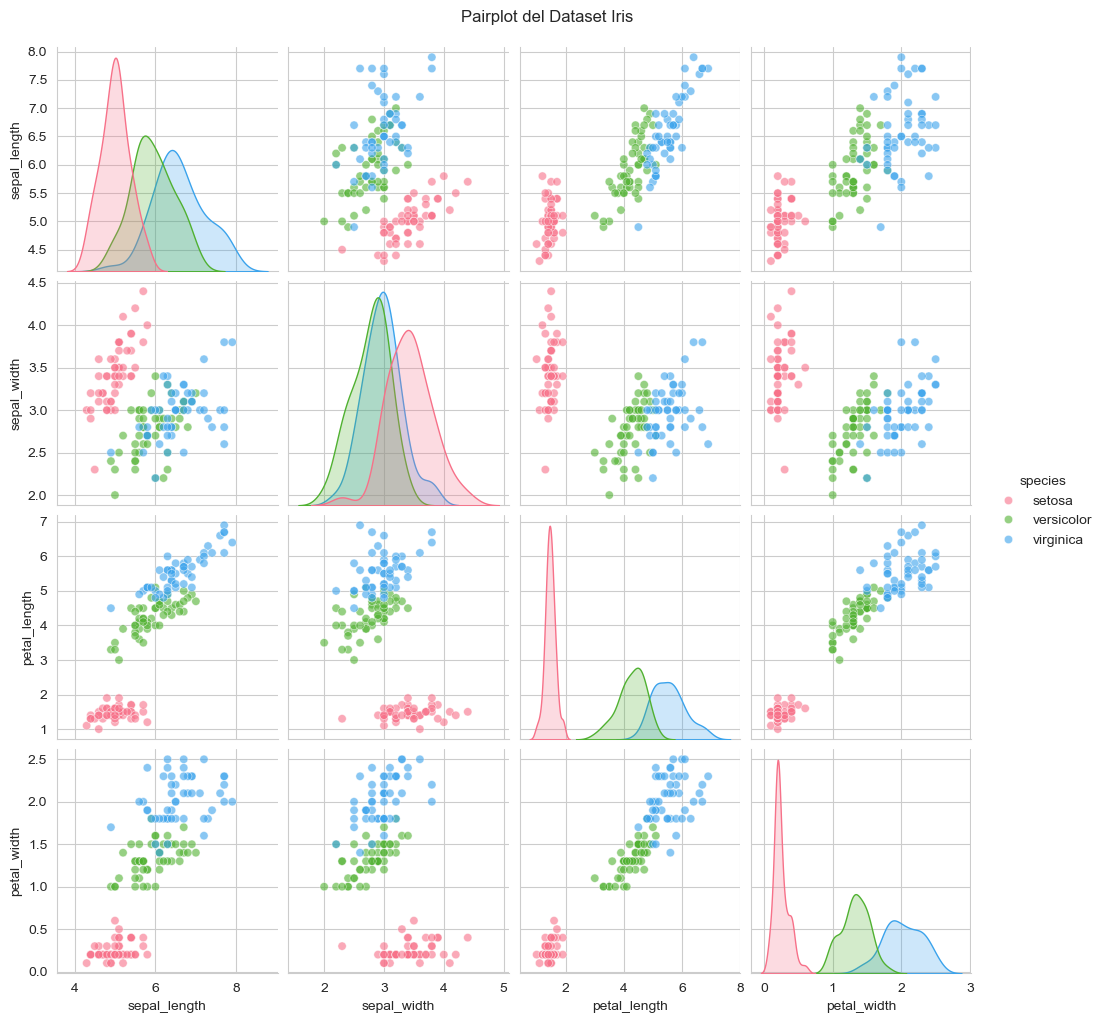

In [33]:
print("\nGenerando Pairplot (puede tardar unos segundos)...")
g = sns.pairplot(iris, hue='species', palette='husl', 
                 diag_kind='kde', plot_kws={'alpha': 0.6})
g.fig.suptitle('Pairplot del Dataset Iris', y=1.02)
plt.show()



## 7.2 PAIRPLOT personalizado

In [34]:
print("""

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
📊 PAIRPLOT (Matriz de Dispersión)
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

DEFINICIÓN:
  Crea una matriz de gráficos que muestra las relaciones entre todas las 
  variables numéricas de un dataset.

PARA QUÉ SE USA:
  • Explorar relaciones entre múltiples variables simultáneamente
  • Detectar correlaciones y patrones en los datos
  • Identificar distribuciones de variables individuales
  • Análisis exploratorio de datos (EDA) inicial

FUNCIÓN:
  seaborn.pairplot(data, hue=None, vars=None, kind='scatter', diag_kind='auto')

PARÁMETROS PRINCIPALES:
  - data: DataFrame de pandas
  - hue: variable categórica para colorear los puntos
  - vars: lista de variables a incluir (por defecto todas las numéricas)
  - kind: tipo de gráfico ('scatter', 'kde', 'hist', 'reg')
  - diag_kind: tipo de gráfico en la diagonal ('auto', 'hist', 'kde')

""")



━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
📊 PAIRPLOT (Matriz de Dispersión)
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

DEFINICIÓN:
  Crea una matriz de gráficos que muestra las relaciones entre todas las 
  variables numéricas de un dataset.

PARA QUÉ SE USA:
  • Explorar relaciones entre múltiples variables simultáneamente
  • Detectar correlaciones y patrones en los datos
  • Identificar distribuciones de variables individuales
  • Análisis exploratorio de datos (EDA) inicial

FUNCIÓN:
  seaborn.pairplot(data, hue=None, vars=None, kind='scatter', diag_kind='auto')

PARÁMETROS PRINCIPALES:
  - data: DataFrame de pandas
  - hue: variable categórica para colorear los puntos
  - vars: lista de variables a incluir (por defecto todas las numéricas)
  - kind: tipo de gráfico ('scatter', 'kde', 'hist', 'reg')
  - diag_kind: tipo de gráfico en la diagonal ('auto', 'hist', 'kde')




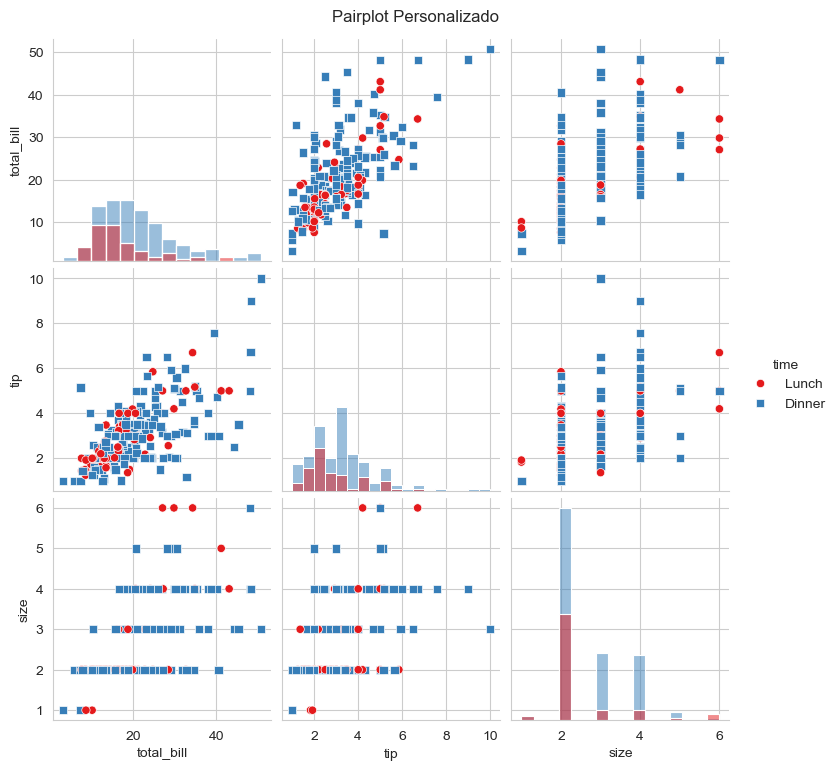

In [35]:

g = sns.pairplot(tips, 
                 vars=['total_bill', 'tip', 'size'],
                 hue='time',
                 diag_kind='hist',
                 markers=['o', 's'],
                 palette='Set1')
g.fig.suptitle('Pairplot Personalizado', y=1.02)
plt.show()





## 7.3 JOINTPLOT (gráfico conjunto)

<Figure size 1500x400 with 0 Axes>

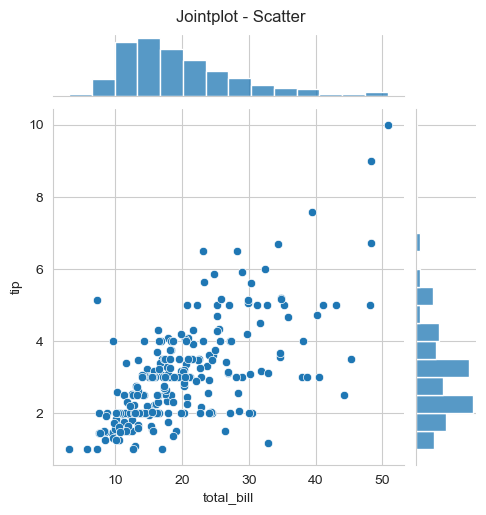

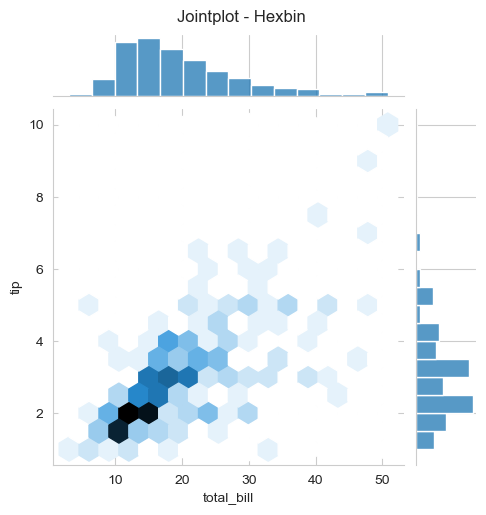

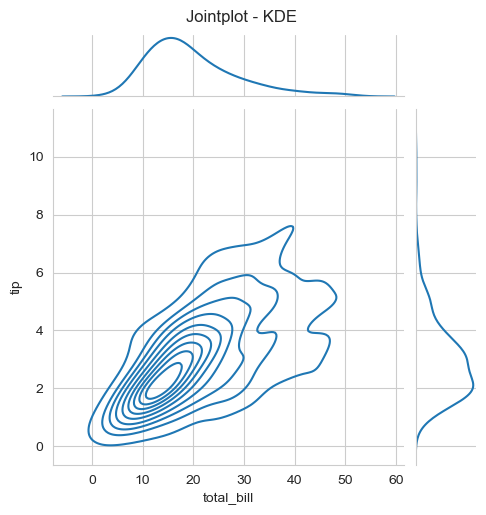

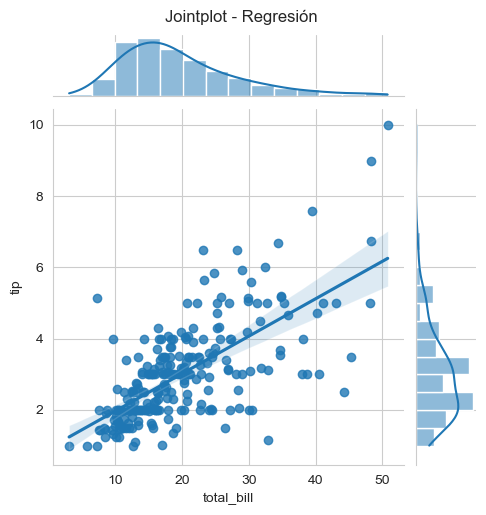

In [36]:

plt.figure(figsize=(15, 4))

# Diferentes tipos de jointplot
g1 = sns.jointplot(data=tips, x='total_bill', y='tip', kind='scatter', height=5)
g1.fig.suptitle('Jointplot - Scatter', y=1.02)

g2 = sns.jointplot(data=tips, x='total_bill', y='tip', kind='hex', height=5)
g2.fig.suptitle('Jointplot - Hexbin', y=1.02)

g3 = sns.jointplot(data=tips, x='total_bill', y='tip', kind='kde', height=5)
g3.fig.suptitle('Jointplot - KDE', y=1.02)

g4 = sns.jointplot(data=tips, x='total_bill', y='tip', kind='reg', height=5)
g4.fig.suptitle('Jointplot - Regresión', y=1.02)

plt.show()

## 8. FACETGRID - SUBGRÁFICOS

In [37]:
print("""
¿QUÉ ES?
FacetGrid es una clase que crea una cuadrícula de subgráficos basada en 
una o más variables categóricas. Cada subgráfico muestra un subconjunto 
de los datos.

¿PARA QUÉ SE USA?
- Comparar patrones entre múltiples grupos
- Visualizar interacciones entre variables categóricas
- Análisis de datos segmentados
- Explorar condicionalmente (dado categoría X, ¿qué pasa con Y?)
- Crear visualizaciones complejas de forma sistemática

ESTRUCTURA:
- col: Variable para columnas
- row: Variable para filas
- hue: Variable para color dentro de cada panel
- Cada panel muestra datos filtrados por esa combinación

FUNCIÓN DE SEABORN:
# Paso 1: Crear grid
g = sns.FacetGrid(data, col, row, hue, col_wrap, height, aspect, 
                  palette, col_order, row_order, hue_order, legend_out)

# Paso 2: Mapear función de gráfico
g.map(función, 'variable_x', 'variable_y', ...)

# Paso 3: Personalizar
g.add_legend()
g.set_axis_labels()
g.set_titles()

PARÁMETROS PRINCIPALES FacetGrid:
- data: DataFrame
- col: Variable categórica para columnas
- row: Variable categórica para filas
- hue: Variable para colores
- col_wrap: Número de columnas antes de wrap (solo con col)
- height: Altura de cada facet
- aspect: Ratio ancho/alto
- palette: Paleta de colores
- col_order, row_order, hue_order: Orden de categorías
- margin_titles: True para títulos en margen
- legend_out: True para leyenda fuera del gráfico
- sharex, sharey: Compartir ejes entre facets
- xlim, ylim: Límites de ejes

FUNCIONES COMUNES PARA MAPEAR:
- plt.scatter, sns.scatterplot
- plt.plot, sns.lineplot
- plt.hist, sns.histplot
- sns.kdeplot
- sns.regplot
- sns.boxplot, sns.violinplot

EJEMPLOS:
""")


¿QUÉ ES?
FacetGrid es una clase que crea una cuadrícula de subgráficos basada en 
una o más variables categóricas. Cada subgráfico muestra un subconjunto 
de los datos.

¿PARA QUÉ SE USA?
- Comparar patrones entre múltiples grupos
- Visualizar interacciones entre variables categóricas
- Análisis de datos segmentados
- Explorar condicionalmente (dado categoría X, ¿qué pasa con Y?)
- Crear visualizaciones complejas de forma sistemática

ESTRUCTURA:
- col: Variable para columnas
- row: Variable para filas
- hue: Variable para color dentro de cada panel
- Cada panel muestra datos filtrados por esa combinación

FUNCIÓN DE SEABORN:
# Paso 1: Crear grid
g = sns.FacetGrid(data, col, row, hue, col_wrap, height, aspect, 
                  palette, col_order, row_order, hue_order, legend_out)

# Paso 2: Mapear función de gráfico
g.map(función, 'variable_x', 'variable_y', ...)

# Paso 3: Personalizar
g.add_legend()
g.set_axis_labels()
g.set_titles()

PARÁMETROS PRINCIPALES FacetGrid:
- data: Data

### 8.1 FacetGrid básico

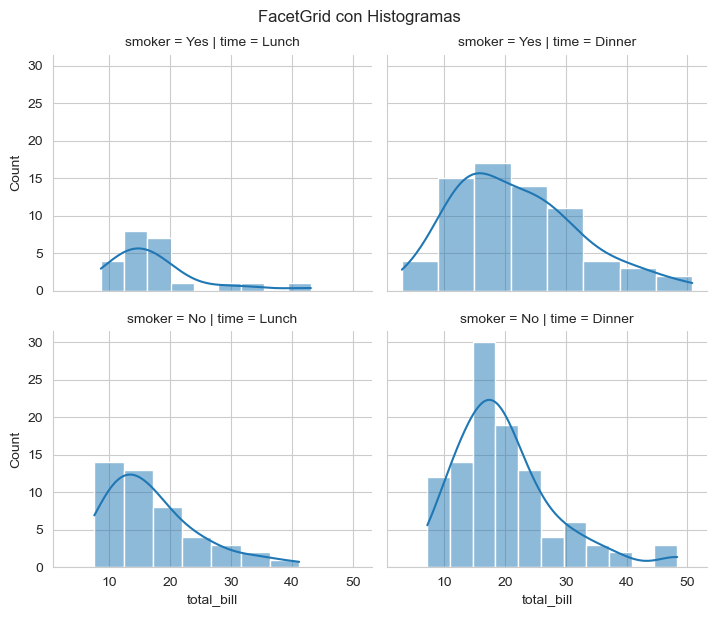

In [38]:
g = sns.FacetGrid(tips, col='time', row='smoker', height=3, aspect=1.2)
g.map(sns.histplot, 'total_bill', kde=True)
g.add_legend()
g.fig.suptitle('FacetGrid con Histogramas', y=1.02)
plt.show()

### 8.2 FacetGrid con scatterplot

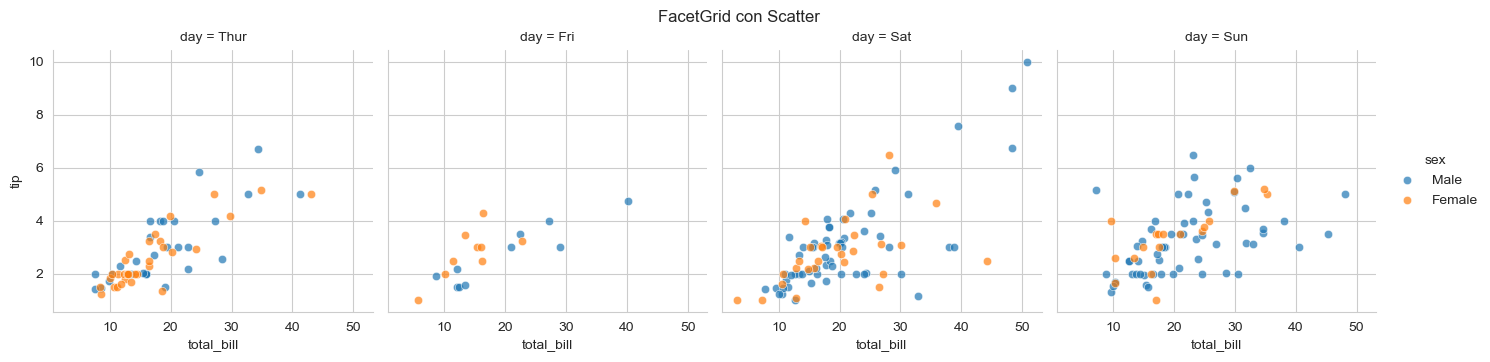

In [39]:
g = sns.FacetGrid(tips, col='day', hue='sex', height=3.5)
g.map(sns.scatterplot, 'total_bill', 'tip', alpha=0.7)
g.add_legend()
g.fig.suptitle('FacetGrid con Scatter', y=1.02)
plt.show()



### 8.3 FacetGrid personalizado

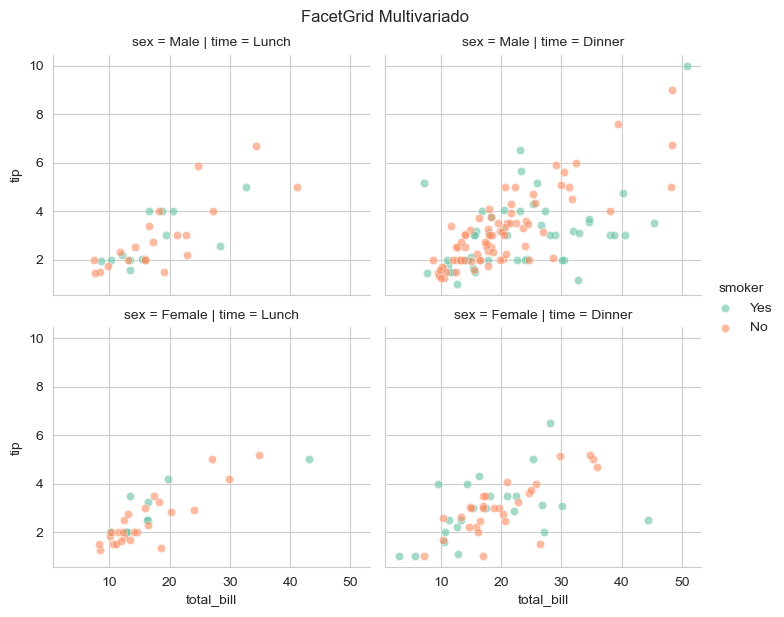

In [40]:

g = sns.FacetGrid(tips, col='time', row='sex', hue='smoker', 
                  height=3, aspect=1.2, palette='Set2')
g.map(sns.scatterplot, 'total_bill', 'tip', alpha=0.6)
g.add_legend()
g.fig.suptitle('FacetGrid Multivariado', y=1.02)
plt.show()

## 9. RELPLOT Y CATPLOT

### 9.1 RELPLOT (gráficos de relación)

In [41]:

print("""
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
🔗 RELPLOT (Gráficos de Relación)
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

DEFINICIÓN:
  Interfaz de alto nivel para crear gráficos relacionales (scatter y line 
  plots) en una cuadrícula de FacetGrid.

PARA QUÉ SE USA:
  • Visualizar relaciones entre variables numéricas
  • Crear scatterplots o lineplots con facetas automáticas
  • Explorar cómo las relaciones varían según categorías
  • Combina la funcionalidad de scatterplot/lineplot con FacetGrid

FUNCIÓN:
  seaborn.relplot(data, x, y, hue=None, size=None, style=None, 
                  col=None, row=None, kind='scatter')

PARÁMETROS PRINCIPALES:
  - x, y: variables para los ejes
  - hue: variable para color
  - size: variable para tamaño de puntos
  - style: variable para estilo de marcadores
  - col, row: variables para crear facetas
  - kind: 'scatter' o 'line'""")



━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
🔗 RELPLOT (Gráficos de Relación)
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

DEFINICIÓN:
  Interfaz de alto nivel para crear gráficos relacionales (scatter y line 
  plots) en una cuadrícula de FacetGrid.

PARA QUÉ SE USA:
  • Visualizar relaciones entre variables numéricas
  • Crear scatterplots o lineplots con facetas automáticas
  • Explorar cómo las relaciones varían según categorías
  • Combina la funcionalidad de scatterplot/lineplot con FacetGrid

FUNCIÓN:
  seaborn.relplot(data, x, y, hue=None, size=None, style=None, 
                  col=None, row=None, kind='scatter')

PARÁMETROS PRINCIPALES:
  - x, y: variables para los ejes
  - hue: variable para color
  - size: variable para tamaño de puntos
  - style: variable para estilo de marcadores
  - col, row: variables para crear facetas
  - kind: 'scatter' o 'line'


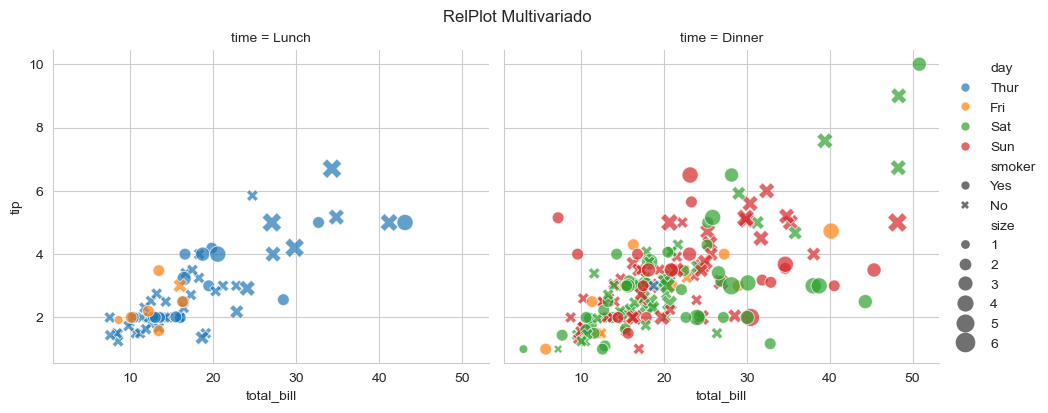

In [42]:

g = sns.relplot(data=tips, x='total_bill', y='tip', 
                col='time', hue='day', style='smoker',
                size='size', sizes=(40, 200), alpha=0.7,
                height=4, aspect=1.2)
g.fig.suptitle('RelPlot Multivariado', y=1.02)
plt.show()

### 9.2 CATPLOT (gráficos categóricos)

In [43]:
print("""
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
📦 CATPLOT (Gráficos Categóricos)
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

DEFINICIÓN:
  Interfaz de alto nivel para crear diversos tipos de gráficos categóricos 
  en una cuadrícula de FacetGrid.

PARA QUÉ SE USA:
  • Visualizar relaciones entre variables categóricas y numéricas
  • Comparar distribuciones o estadísticos entre categorías
  • Crear múltiples tipos de gráficos categóricos
  • Análisis de datos con variables cualitativas

FUNCIÓN:
  seaborn.catplot(data, x, y, hue=None, col=None, row=None, 
                  kind='strip')

PARÁMETROS PRINCIPALES:
  - x, y: variables para los ejes (al menos una categórica)
  - hue: variable categórica para color
  - col, row: variables para crear facetas
  - kind: tipo de gráfico categórico:
      • 'strip': gráfico de dispersión categórico
      • 'swarm': puntos sin superposición
      • 'box': diagrama de caja
      • 'violin': gráfico de violín
      • 'boxen': diagrama de caja mejorado
      • 'point': gráfico de puntos con líneas
      • 'bar': gráfico de barras
      • 'count': conteo de observaciones


""")


━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
📦 CATPLOT (Gráficos Categóricos)
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

DEFINICIÓN:
  Interfaz de alto nivel para crear diversos tipos de gráficos categóricos 
  en una cuadrícula de FacetGrid.

PARA QUÉ SE USA:
  • Visualizar relaciones entre variables categóricas y numéricas
  • Comparar distribuciones o estadísticos entre categorías
  • Crear múltiples tipos de gráficos categóricos
  • Análisis de datos con variables cualitativas

FUNCIÓN:
  seaborn.catplot(data, x, y, hue=None, col=None, row=None, 
                  kind='strip')

PARÁMETROS PRINCIPALES:
  - x, y: variables para los ejes (al menos una categórica)
  - hue: variable categórica para color
  - col, row: variables para crear facetas
  - kind: tipo de gráfico categórico:
      • 'strip': gráfico de dispersión categórico
      • 'swarm': puntos sin superposición
      • 'box': diagrama de caja
      • '

In [ ]:

g = sns.catplot(data=tips, x='day', y='total_bill', 
                hue='sex', col='time', kind='violin',
                height=4, aspect=1.2)
g.fig.suptitle('CatPlot con Violines', y=1.02)
plt.show()



### 9.3 CATPLOT con diferentes tipos

In [ ]:
kinds = ['strip', 'box', 'violin', 'bar']
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for i, kind in enumerate(kinds):
    ax = axes[i//2, i%2]
    g = sns.catplot(data=tips, x='day', y='total_bill', 
                    hue='sex', kind=kind, 
                    height=3.5, aspect=1.5, ax=ax)
    plt.close(g.fig)  # Cerrar la figura creada por catplot
    ax.set_title(f'CatPlot - {kind.capitalize()}')

plt.tight_layout()
plt.show()

# 10. PERSONALIZACIÓN AVANZADA

In [ ]:
print("\n" + "="*80)
print("10. PERSONALIZACIÓN AVANZADA")
print("="*80)

# 10.1 Paletas de colores personalizadas
plt.figure(figsize=(15, 8))

# Paletas cualitativas
plt.subplot(3, 3, 1)
sns.barplot(data=tips, x='day', y='total_bill', palette='deep')
plt.title('Paleta: deep')

plt.subplot(3, 3, 2)
sns.barplot(data=tips, x='day', y='total_bill', palette='pastel')
plt.title('Paleta: pastel')

plt.subplot(3, 3, 3)
sns.barplot(data=tips, x='day', y='total_bill', palette='Set2')
plt.title('Paleta: Set2')

# Paletas secuenciales
plt.subplot(3, 3, 4)
pal = sns.color_palette('Blues', n_colors=4)
sns.barplot(data=tips, x='day', y='total_bill', palette=pal)
plt.title('Paleta: Blues')

plt.subplot(3, 3, 5)
pal = sns.color_palette('YlOrRd', n_colors=4)
sns.barplot(data=tips, x='day', y='total_bill', palette=pal)
plt.title('Paleta: YlOrRd')

plt.subplot(3, 3, 6)
pal = sns.color_palette('rocket', n_colors=4)
sns.barplot(data=tips, x='day', y='total_bill', palette=pal)
plt.title('Paleta: rocket')

# Paletas divergentes
plt.subplot(3, 3, 7)
pal = sns.color_palette('coolwarm', n_colors=4)
sns.barplot(data=tips, x='day', y='total_bill', palette=pal)
plt.title('Paleta: coolwarm')

plt.subplot(3, 3, 8)
pal = sns.color_palette('RdYlGn', n_colors=4)
sns.barplot(data=tips, x='day', y='total_bill', palette=pal)
plt.title('Paleta: RdYlGn')

plt.subplot(3, 3, 9)
# Paleta personalizada
custom_pal = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A']
sns.barplot(data=tips, x='day', y='total_bill', palette=custom_pal)
plt.title('Paleta: Custom')

plt.tight_layout()
plt.show()

# 10.2 Gráfico completamente personalizado
fig, ax = plt.subplots(figsize=(12, 6))

# Crear gráfico
sns.scatterplot(data=tips, x='total_bill', y='tip', 
                hue='time', size='size', style='smoker',
                palette='husl', sizes=(50, 400), alpha=0.7, ax=ax)

# Añadir línea de regresión
sns.regplot(data=tips, x='total_bill', y='tip', 
            scatter=False, color='red', ax=ax, line_kws={'linewidth': 2, 'linestyle': '--'})

# Personalizar
ax.set_title('Relación entre Cuenta Total y Propina', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Cuenta Total ($)', fontsize=12, fontweight='bold')
ax.set_ylabel('Propina ($)', fontsize=12, fontweight='bold')
ax.grid(True, alpha=0.3, linestyle='--')
ax.legend(title='Leyenda', title_fontsize=12, loc='upper left', framealpha=0.9)

# Añadir texto
ax.text(45, 2, 'Línea de regresión', fontsize=10, color='red', style='italic')

plt.tight_layout()
plt.show()

# 11. CASO PRÁCTICO: ANÁLISIS COMPLETO

In [ ]:

print("\n" + "="*80)
print("11. CASO PRÁCTICO: ANÁLISIS COMPLETO DEL DATASET TIPS")
print("="*80)

# Configuración
sns.set_style('whitegrid')
sns.set_context('notebook')

# Crear figura compleja
fig = plt.figure(figsize=(18, 12))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# 1. Distribución de cuentas totales
ax1 = fig.add_subplot(gs[0, 0])
sns.histplot(tips['total_bill'], kde=True, color='skyblue', ax=ax1)
ax1.set_title('Distribución de Cuentas', fontweight='bold')
ax1.set_xlabel('Cuenta Total ($)')

# 2. Propinas por día
ax2 = fig.add_subplot(gs[0, 1])
sns.boxplot(data=tips, x='day', y='tip', palette='Set2', ax=ax2)
ax2.set_title('Propinas por Día', fontweight='bold')
ax2.set_xlabel('Día')
ax2.set_ylabel('Propina ($)')

# 3. Conteo por categorías
ax3 = fig.add_subplot(gs[0, 2])
sns.countplot(data=tips, x='day', hue='time', palette='muted', ax=ax3)
ax3.set_title('Frecuencia de Visitas', fontweight='bold')
ax3.set_xlabel('Día')
ax3.legend(title='Momento')

# 4. Relación cuenta-propina
ax4 = fig.add_subplot(gs[1, :2])
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='time', 
                style='smoker', size='size', palette='husl', 
                sizes=(50, 300), alpha=0.7, ax=ax4)
sns.regplot(data=tips, x='total_bill', y='tip', scatter=False, 
            color='red', ax=ax4, line_kws={'linestyle': '--'})
ax4.set_title('Relación Cuenta Total vs Propina', fontweight='bold', fontsize=14)
ax4.set_xlabel('Cuenta Total ($)')
ax4.set_ylabel('Propina ($)')

# 5. Mapa de calor de correlación
ax5 = fig.add_subplot(gs[1, 2])
corr = tips[['total_bill', 'tip', 'size']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, ax=ax5, cbar_kws={'shrink': 0.8})
ax5.set_title('Correlaciones', fontweight='bold')

# 6. Propinas por tamaño de grupo
ax6 = fig.add_subplot(gs[2, 0])
sns.violinplot(data=tips, x='size', y='tip', palette='pastel', ax=ax6)
ax6.set_title('Propinas por Tamaño del Grupo', fontweight='bold')
ax6.set_xlabel('Tamaño del Grupo')
ax6.set_ylabel('Propina ($)')

# 7. Promedio de cuenta por día y fumador
ax7 = fig.add_subplot(gs[2, 1])
sns.barplot(data=tips, x='day', y='total_bill', hue='smoker', 
            palette='Set1', ax=ax7)
ax7.set_title('Cuenta Promedio por Día', fontweight='bold')
ax7.set_xlabel('Día')
ax7.set_ylabel('Cuenta Promedio ($)')
ax7.legend(title='Fumador')

# 8. KDE bidimensional
ax8 = fig.add_subplot(gs[2, 2])
sns.kdeplot(data=tips, x='total_bill', y='tip', 
            fill=True, cmap='viridis', levels=10, ax=ax8)
ax8.set_title('Densidad 2D', fontweight='bold')
ax8.set_xlabel('Cuenta Total ($)')
ax8.set_ylabel('Propina ($)')

fig.suptitle('Dashboard de Análisis Completo - Dataset Tips', 
             fontsize=18, fontweight='bold', y=0.995)

plt.show()

# 12. CONSEJOS Y MEJORES PRÁCTICAS

In [ ]:


print("\n" + "="*80)
print("12. CONSEJOS Y MEJORES PRÁCTICAS")
print("="*80)

consejos = """
CONSEJOS PARA USAR SEABORN EFECTIVAMENTE:

1. ELECCIÓN DEL GRÁFICO:
   - Distribuciones: histplot, kdeplot, violinplot
   - Relaciones: scatterplot, lineplot, regplot
   - Categorías: barplot, boxplot, countplot
   - Multivariado: pairplot, heatmap, clustermap

2. PERSONALIZACIÓN:
   - Usa paletas de colores apropiadas para tus datos
   - Añade títulos y etiquetas descriptivas
   - Ajusta el tamaño de la figura según la cantidad de información

3. RENDIMIENTO:
   - Para datasets grandes, considera muestrear los datos
   - Usa 'ci=None' en barplot/lineplot para mejorar velocidad
   - Evita pairplot con muchas variables (>6)

4. ESTILO:
   - Mantén consistencia en el estilo visual
   - Usa set_context() para ajustar tamaños según el medio (paper, poster, etc.)
   - Combina Seaborn con matplotlib para control total

5. INTERPRETACIÓN:
   - Boxplot: muestra cuartiles y outliers
   - Violinplot: muestra distribución completa
   - Heatmap: ideal para correlaciones y matrices
   - Pairplot: explora relaciones múltiples rápidamente

6. FUNCIONES DE ALTO NIVEL:
   - relplot: unifica scatterplot y lineplot con facets
   - catplot: unifica todos los gráficos categóricos con facets
   - Más flexibles que sus contrapartes individuales

7. INTEGRACIÓN:
   - Seaborn funciona perfectamente con pandas DataFrames
   - Combina con matplotlib para personalización extrema
   - Usa con numpy para cálculos estadísticos
"""

print(consejos)


# 13. EJERCICIOS PROPUESTOS

In [ ]:
print("\n" + "="*80)
print("13. EJERCICIOS PROPUESTOS PARA PRACTICAR")
print("="*80)

ejercicios = """
EJERCICIOS PARA PRACTICAR:

NIVEL BÁSICO:
1. Crea un histograma de la columna 'size' del dataset tips
2. Genera un countplot que muestre la distribución por género
3. Haz un scatterplot de total_bill vs tip con colores por día

NIVEL INTERMEDIO:
4. Crea un boxplot que compare propinas entre fumadores y no fumadores por día
5. Genera un heatmap con las correlaciones entre variables numéricas
6. Usa FacetGrid para crear histogramas de propinas separados por día y momento"""

print(ejercicios)